# Modeling & Evaluation_Task_4.Appended to Task_2&3_Final Submission

## 0.  Import Packages

### importing relevant libraries

In [1]:
#removes warnings
import warnings
warnings.filterwarnings('ignore')
import os
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression


In [2]:
#for Data wrangling and analysis
import pandas as pd 
import numpy as np

# for feature enginneering 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

#for data visualations
import seaborn as sns
# Set plot style
sns.set(color_codes=True)

# Set maximum number of columns to be displayed
pd.set_option('display.max_columns', 100)
#imput values in place of missing values or NaNs
from sklearn.impute import SimpleImputer
#plot and show graphs
import matplotlib.pyplot as plt

%matplotlib inline
# to read files

import csv
# for dates
import datetime

import pickle

### 1.  Loading data

#### Data directory

In [3]:
train_data = pd.read_csv(r"C:\Users\User\Downloads\BCG_Related\ml_case_training_data.csv")
churn_data = pd.read_csv(r"C:\Users\User\Downloads\BCG_Related\ml_case_training_output.csv")
history_data = pd.read_csv(r"C:\Users\User\Downloads\BCG_Related\ml_case_training_hist_data.csv")

In [4]:
"""import os

cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files)"""

'import os\n\ncwd = os.getcwd()  # Get the current working directory (cwd)\nfiles = os.listdir(cwd)  # Get all the files in that directory\nprint("Files in %r: %s" % (cwd, files)'

The data were imported directly into dataframe from file local location.

## Exploration of  history_data

In [5]:
train_data.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,2015-11-09,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,NaN,2015-06-23,NaN,NaN,NaN,NaN,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,2009-08-21,2015-08-31,NaN,NaN,NaN,NaN,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,2010-04-16,2015-04-17,NaN,NaN,NaN,NaN,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,2010-03-30,2015-03-31,NaN,NaN,NaN,NaN,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


From above we can already see that there are a lot of NaN values. We will replace or remove those values later.

The ﬁrst 5 rows of the dataframe also show us that there is numeric data and categorical data, which we will need to transform to the right form for machine larning purpose.

In [6]:
# checking the data type
type(train_data)

pandas.core.frame.DataFrame

In [8]:
churn_data.head()

,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1
2,d29c2c54acc38ff3c0614d0a653813dd,0
3,764c75f661154dac3a6c254cd082ea7d,0
4,bba03439a292a1e166f80264c16191cb,0


It seems the churn data is in the correct format as it shows 0 for not churned and 1 for churned. There would be no need to convert.

In [10]:
history_data.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


a lot of values are zeros in the historic data

### Combining two dataframes

We loaded data in two different pandas dataframes. Nonetheless, we might be interested in putting the data into a single dataframe to access it more easily. We can merge the two dataframes on a common column ( id ) using the function pd.merge() from pandas.

In [11]:
#last  5 row of the combined dataframe.
train = pd.merge(train_data, churn_data, on="id")
train.tail()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
16091,18463073fb097fc0ac5d3e040f356987,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,NaN,2015-05-08,2014-05-26,NaN,NaN,NaN,NaN,4648.01,0,0.0,18.57,0.138305,0.000000,44.311378,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0
16092,d0a6f71671571ed83b2645d23af6de00,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2012-08-27,2015-08-28,68.64,68.64,1254.65,15.94,631.69,181,0.0,144.03,0.100167,0.091892,58.995952,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,1
16093,10e6828ddd62cbcf687cb74928c4c2d2,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,NaN,2012-02-08,2015-02-09,NaN,NaN,NaN,NaN,190.39,179,0.0,129.60,0.116900,0.100015,40.606701,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1
16094,1cf20fd6206d7678d5bcafd28c53b4db,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,NaN,2012-08-30,2015-08-31,NaN,NaN,NaN,NaN,19.34,0,0.0,7.18,0.145711,0.000000,44.311378,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0
16095,563dde550fd624d7352f3de77c0cdfcd,NaN,NaN,NaN,8730,0,0,2009-12-18,2016-12-17,NaN,2009-12-18,2015-12-21,NaN,NaN,NaN,NaN,762.41,0,0.0,1.07,0.167086,0.088454,45.311378,f,0.00,11.84,11.84,1,96.34,6,ldkssxwpmemidmecebumciepifcamkci,10.392,0


2. ## General statistics of the aggregated dataframe


#### Data types
it important to understand the dataset when dealing with analysis, as the data types might end up causing errors into our analysis at a later stage.

Below, we can quickly see the dates in our dataset are not datetime types yet, which means we might need to convert them. In addition, we can see that the churn is full of integers so we can keep it in that form.

It usually useful to transform data into dataframe  to facilitate visualization.



In [12]:
pd.DataFrame({"Data type":train.dtypes})

,Data type
id,object
activity_new,object
campaign_disc_ele,float64
channel_sales,object
cons_12m,int64
cons_gas_12m,int64
cons_last_month,int64
date_activ,object
date_end,object
date_first_activ,object


In [13]:
pd.DataFrame({"Data type":history_data.dtypes})

,Data type
id,object
price_date,object
price_p1_var,float64
price_p2_var,float64
price_p3_var,float64
price_p1_fix,float64
price_p2_fix,float64
price_p3_fix,float64


### Dataframe statistics

In [14]:
#displays the statistical summary of the dataframe
train.describe()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,0.0,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,15970.000000,16096.000000,15970.000000,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000,16096.000000
mean,NaN,1.948044e+05,3.191164e+04,1.946154e+04,335.843857,335.843857,3837.441866,206.845165,2370.555949,1907.347229,0.991547,70.309945,0.135901,0.052951,43.533496,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131,0.099093
std,NaN,6.795151e+05,1.775885e+05,8.235676e+04,649.406000,649.406000,5425.744327,455.634288,4035.085664,5257.364759,5.160969,79.023251,0.026252,0.048617,5.212252,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421,0.298796
min,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000,0.000000
25%,NaN,5.906250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.175000,0.000000,513.230000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000,0.000000
50%,NaN,1.533250e+04,0.000000e+00,9.010000e+02,162.955000,162.955000,2187.230000,42.215000,1179.160000,378.000000,0.000000,19.440000,0.142881,0.086163,44.311378,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000,0.000000
75%,NaN,5.022150e+04,0.000000e+00,4.127000e+03,396.185000,396.185000,4246.555000,228.117500,2692.077500,1994.250000,0.000000,131.470000,0.146348,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000,0.000000
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000,1.000000


In [15]:
train["campaign_disc_ele"].isnull().values.all()

True

#### Observations

1.	The minimum consumption and forecasts for electricity and gas (yearly and monthly) are negative. This could mean that the client companies are producing energy and therefore energy should be "returned", although it is unlikely and we will consider it as corrupted data.
2.	The campaign_disc_ele is an empty column. We verify it by running

train["campaign_disc_ele"].isnull().values.all()

3.	Highly skewed data when we look at the percentiles.


In [14]:
history_data.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.140991,0.054412,0.030712,43.325546,10.698201,6.455436
std,0.025117,0.050033,0.036335,5.437952,12.856046,7.782279
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


#### Observation
For this dataset, it looks overall good.

We might be a bit concerned about the negative values in the fix price column. One more time, this might be corruped data and we will change them to positive when cleaning the data.


### Missing data



There are lot of missing data, it is useful to check how how much of our data is missing.


In [16]:
#checks percentage of missing values
pd.DataFrame({"Missing values (%)": train.isnull().sum()/len(train.index)*100})

,Missing values (%)
id,0.000000
activity_new,59.300447
campaign_disc_ele,100.000000
channel_sales,26.205268
cons_12m,0.000000
cons_gas_12m,0.000000
cons_last_month,0.000000
date_activ,0.000000
date_end,0.012425
date_first_activ,78.205765


#### Observation
we may removed some the the columns,since they have more than 60% of the data missing

In [17]:
pd.DataFrame({"Missing values (%)": history_data.isnull().sum()/len(history_data.index)*100})

,Missing values (%)
id,0.000000
price_date,0.000000
price_p1_var,0.704138
price_p2_var,0.704138
price_p3_var,0.704138
price_p1_fix,0.704138
price_p2_fix,0.704138
price_p3_fix,0.704138


#### Observation
There missing data in this case are not much they can be replaced.

## 3.  Data visualization



### Churn

In [18]:
churn = train[["id","churn"]]

In [19]:
# Rename columns for visualization purposes
churn_columns = ["Companies", "churn"]


In [20]:
# Plot stacked bars with annotations 
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    
    ax = dataframe.plot(kind="bar",stacked=True, figsize=size_, rot=rot_,title=title_)
     # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)") 
    plt.show()

   # Add value annotations to the bar  
def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13): 
    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
            # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
   
    ax.annotate(value,
    ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad), color=colour,
    size=textsize,
    )

   

In [21]:
churn_total = churn.groupby(churn["churn"]).count() 
churn_percentage = churn_total/churn_total.sum()*100

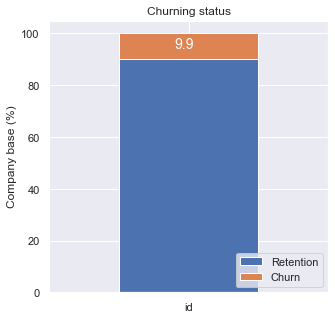

In [22]:
plot_stacked_bars(churn_percentage.transpose(),"Churning status", (5,5), legend_="lower right")

About 10% of the of total customers have churned.Not a bad number.

### SME activity
 visualization of the activity distribution of the companies as well as the sales channel. Intuitively this might be an important predictive feature for energy consumption


In [23]:
activity = train[["id","activity_new", "churn"]]

In [24]:
activity = activity.groupby([activity["activity_new"],
activity["churn"]])["id"].count().unstack(level=1).sort_values(by=[0], ascending = False)


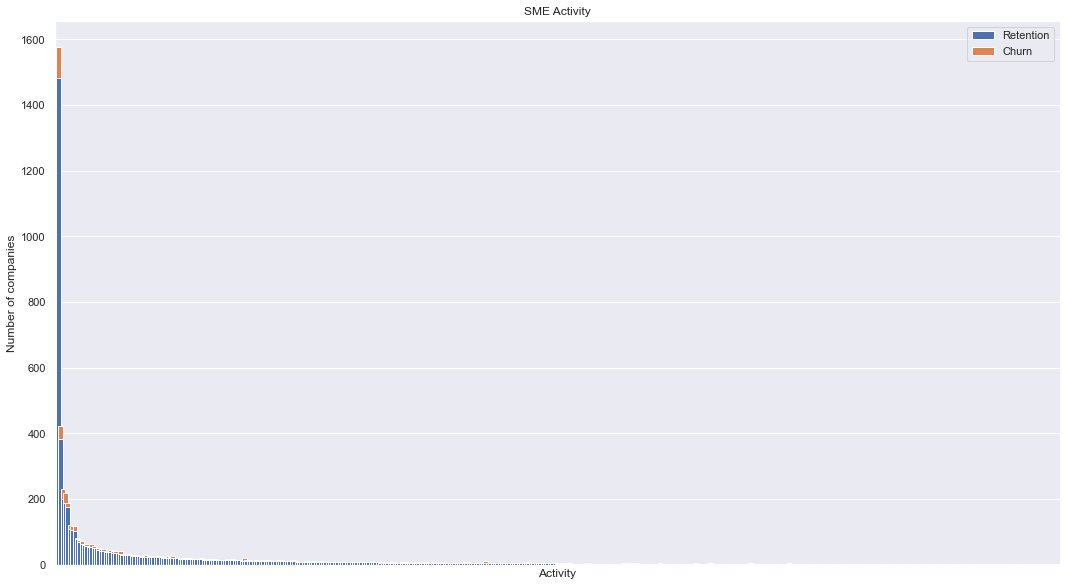

In [25]:
activity.plot(kind="bar",
figsize=(18, 10), width=2,
stacked=True,
title="SME Activity")

# Labels
plt.ylabel("Number of companies") 
plt.xlabel("Activity")

# Rename legend
plt.legend(["Retention", "Churn"], loc="upper right")

# Remove the label for the xticks as the categories are encoded and we can't draw any meaning from them yet
plt.xticks([]) 
plt.show()


### Observations
The distribution of the classes over the labeled data despite the lack of 60% of the entries. We see churn is not speciﬁcally related to any SME cateogry in particular.

#showing the labels in the x-axis to facilitate visualization

If we take a look at the values percentage-wise


In [26]:
activity_total = activity.fillna(0)[0]+activity.fillna(0)[1]


In [27]:
activity_percentage = activity.fillna(0)[1]/activity_total *100
pd.DataFrame({"Percentage churn": activity_percentage,
"Total companies": activity_total }).sort_values(by="Percentage churn",
ascending=False).head(10)

,Percentage churn,Total companies
activity_new,,
xwkaesbkfsacseixxksofpddwfkbobki,100.000000,1.0
wkwdccuiboaeaalcaawlwmldiwmpewma,100.000000,1.0
ikiucmkuisupefxcxfxxulkpwssppfuo,100.000000,1.0
opoiuuwdmxdssidluooopfswlkkkcsxf,100.000000,1.0
pfcocskbxlmofswiflsbcefcpufbopuo,100.000000,2.0
oeacexidmflusdkwuuicmpiaklkxulxm,100.000000,1.0
wceaopxmdpccxfmcdpopulcaubcxibuw,100.000000,1.0
kmlwkmxoocpieebifumobckeafmidpxf,100.000000,1.0
cwouwoubfifoafkxifokoidcuoamebea,66.666667,3.0


#### Observation
If sorted by activity some companies have churned a 100% but this is due to the fact that only a few companies belong to that activity.

How will the SME activity inﬂuence our predictive model?


Our predictive model is likely to struggle accurately predicting the the SME activity due to the large number of categories and low number of companies belonging to each category.

## Sales channel

The sales channel seems to be an important feature when predecting the churning of a user. It is not the same if the sales were through email or telephone

In [28]:
channel = train[["id","channel_sales", "churn"]]

In [29]:
channel = channel.groupby([channel["channel_sales"],
channel["churn"]])["id"].count().unstack(level=1).fillna(0)


In [30]:
channel_churn = (channel.div(channel.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)

We will plot the categories, despite the fact that data is available for only 75% of the dataset
plot_stacked_bars(channel_churn, "Sales Channel", rot_=30)

Nothing out of the normal form this graph above. If we look at it percentage-wise

In [31]:
channel_total = channel.fillna(0)[0]+channel.fillna(0)[1]
channel_percentage = channel.fillna(0)[1]/(channel_total)*100 

pd.DataFrame({"Churn percentage": channel_percentage,
"Total companies": channel_total }).sort_values(by="Churn percentage",
ascending=False).head(10)


,Churn percentage,Total companies
channel_sales,,
foosdfpfkusacimwkcsosbicdxkicaua,12.498306,7377.0
usilxuppasemubllopkaafesmlibmsdf,10.387812,1444.0
ewpakwlliwisiwduibdlfmalxowmwpci,8.488613,966.0
lmkebamcaaclubfxadlmueccxoimlema,5.595755,2073.0
epumfxlbckeskwekxbiuasklxalciiuu,0.000000,4.0
fixdbufsefwooaasfcxdxadsiekoceaa,0.000000,2.0
sddiedcslfslkckwlfkdpoeeailfpeds,0.000000,12.0


### Consumption

Let's see the distribution of the consumption over the last year and last month

In [32]:
consumption = train[["id","cons_12m", "cons_gas_12m","cons_last_month", "imp_cons", "has_gas", "churn"]]

The most straight forward to visualise and identify the distribution of uni-variate data is through histograms

In [33]:
 """
Plot variable distirbution in a stacked histogram of churned or retained company """

def plot_distribution(dataframe, column, ax, bins_=50):
    
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column], "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram

    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')


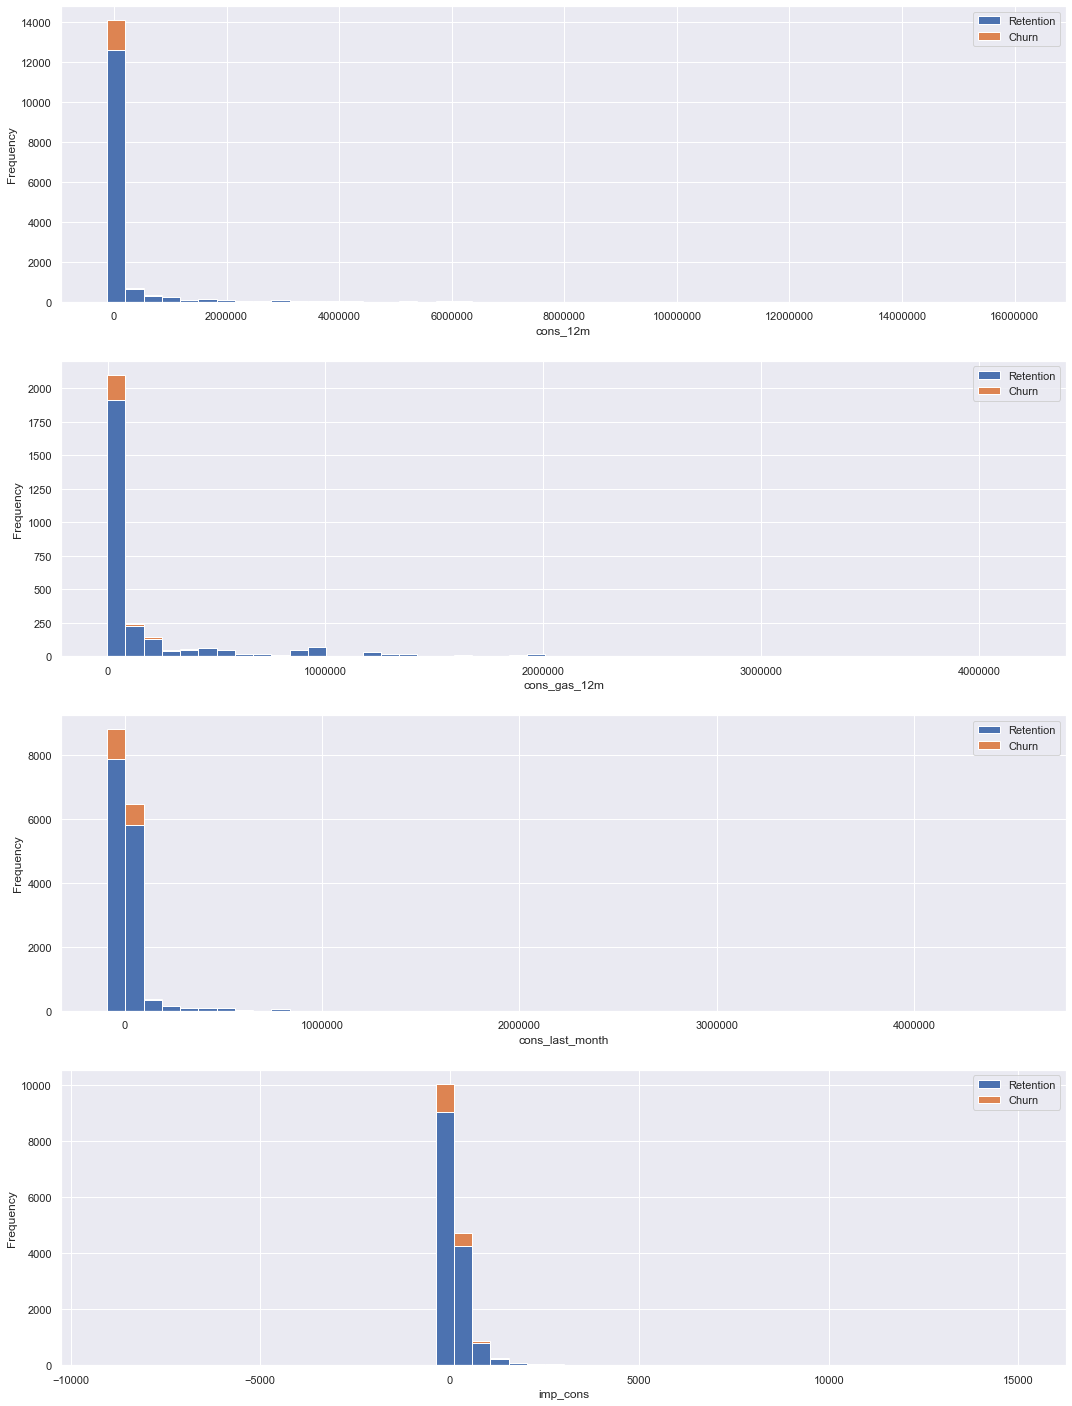

In [34]:
fig, axs = plt.subplots(nrows=4, figsize=(18,25))
# Plot histogram
plot_distribution(consumption, "cons_12m", axs[0])

# Note that the gas consumption must have gas contract
plot_distribution(consumption[consumption["has_gas"] == "t"], "cons_gas_12m", axs[1]) 

plot_distribution(consumption, "cons_last_month", axs[2])
plot_distribution(consumption, "imp_cons", axs[3])



We can clearly see in here that the consumption data is highly skewed to the right, presenting a very long right-tail towards the higher values of the distribution.

The values on the higher end and lower ends of the distribution are likely to be outliers. We can use a standard plot to visualise the outliers in more detail. A boxplot is a standardized way of displaying the distribution of data based on a ﬁve number summary (“minimum”, ﬁrst quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell us about our outliers and what their values are. It can also tell us if our data is symmetrical, how tightly our data is grouped, and if and how our data is skewed


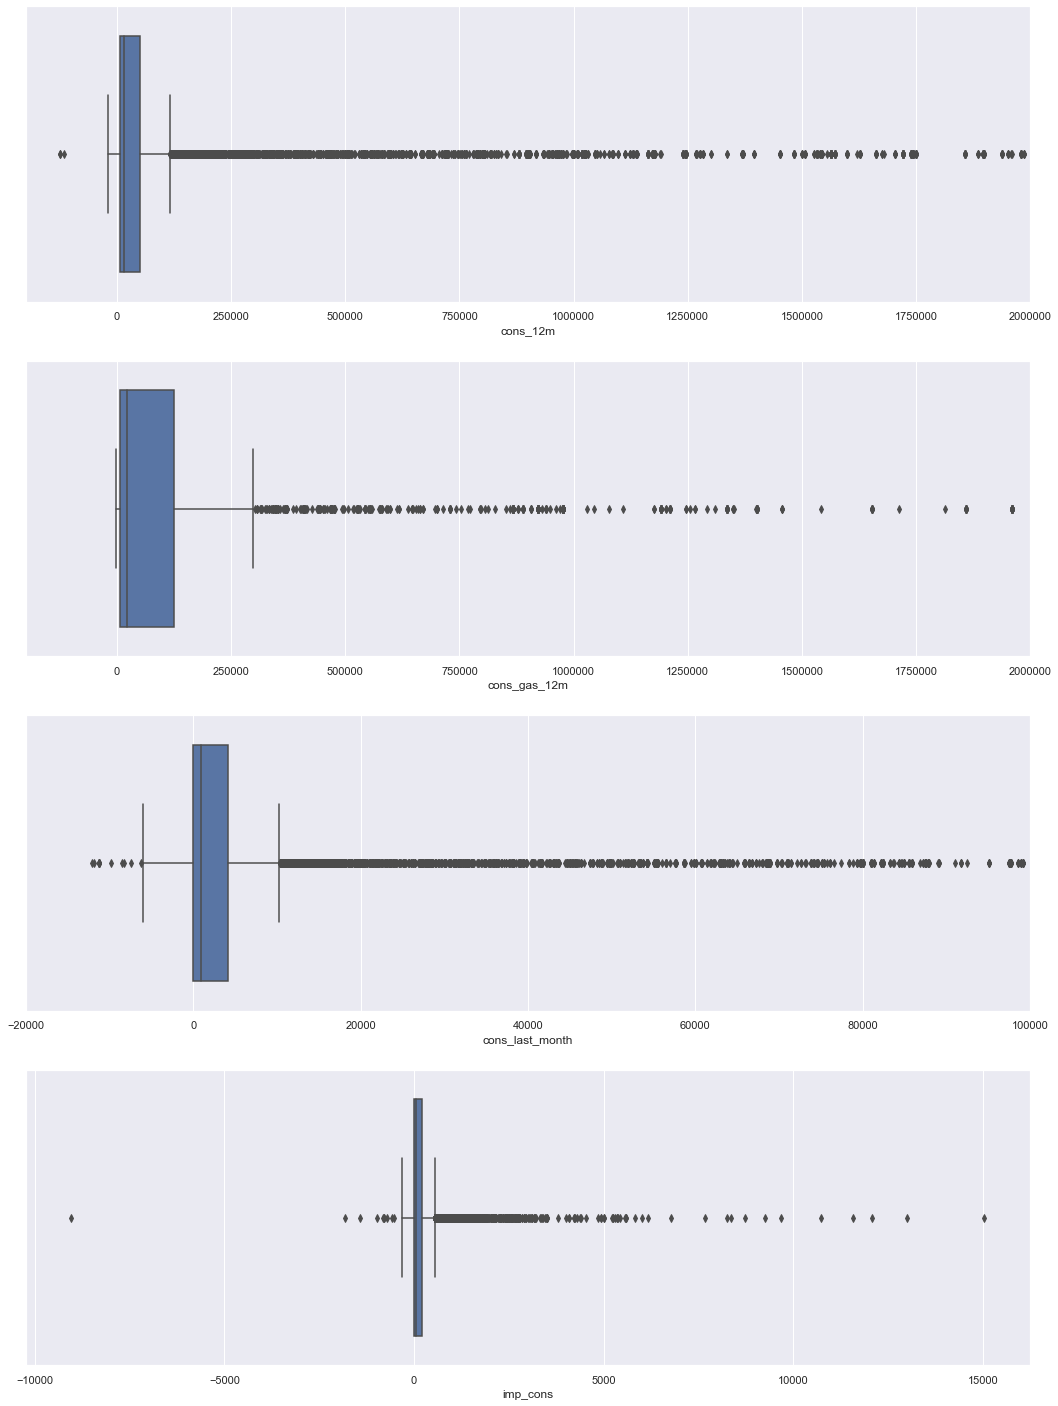

In [35]:
fig, axs = plt.subplots(nrows=4, figsize=(18,25))
# Plot histogram
sns.boxplot(consumption["cons_12m"], ax=axs[0])
sns.boxplot(consumption[consumption["has_gas"] == "t"]["cons_gas_12m"], ax=axs[1]) 
sns.boxplot(consumption["cons_last_month"], ax=axs[2])
sns.boxplot(consumption["imp_cons"], ax=axs[3])
# Remove scientific notation
for ax in axs:
    ax.ticklabel_format(style='plain', axis='x')
    # Set x-axis limit
    axs[0].set_xlim(-200000, 2000000)
    axs[1].set_xlim(-200000, 2000000)
    axs[2].set_xlim(-20000, 100000) 

plt.show()


clearly confirmed an highly skewed distribution with several outliers. 

In [36]:
dates = train[["id","date_activ","date_end", "date_modif_prod","date_renewal","churn"]].copy()

In [37]:
# Transform date columns to datetime type
dates["date_activ"] = pd.to_datetime(dates["date_activ"], format='%Y-%m-%d') 
dates["date_end"] = pd.to_datetime(dates["date_end"], format='%Y-%m-%d')
dates["date_modif_prod"] = pd.to_datetime(dates["date_modif_prod"], format='%Y-%m-%d')
dates["date_renewal"] = pd.to_datetime(dates["date_renewal"], format='%Y-%m-%d')


In [38]:
#Plot monthly churn and retention distribution 

def plot_dates(dataframe, column, fontsize_=12): 
    # Group by month
    temp = dataframe[[column,
    "churn",
    "id"]].set_index(column).groupby([pd.Grouper(freq='M'), "churn"]).count().unstack(level=1)
    # Plot
    ax=temp.plot(kind="bar", stacked=True, figsize=(18,10), rot=0)
    # Change x-axis labels to months
    ax.set_xticklabels(map(lambda x: line_format(x), temp.index))
    # Change xlabel size
    plt.xticks(fontsize=fontsize_)
    # Rename y-axis
    plt.ylabel("Number of companies")
    # Rename legend
    plt.legend(["Retention", "Churn"], loc="upper right") 
    plt.show()
# Convert time label to the format of pandas line plot

def line_format(label):
    month = label.month_name()[:1]
    if label.month_name() == "January": month += f'\n{label.year}'
    return month


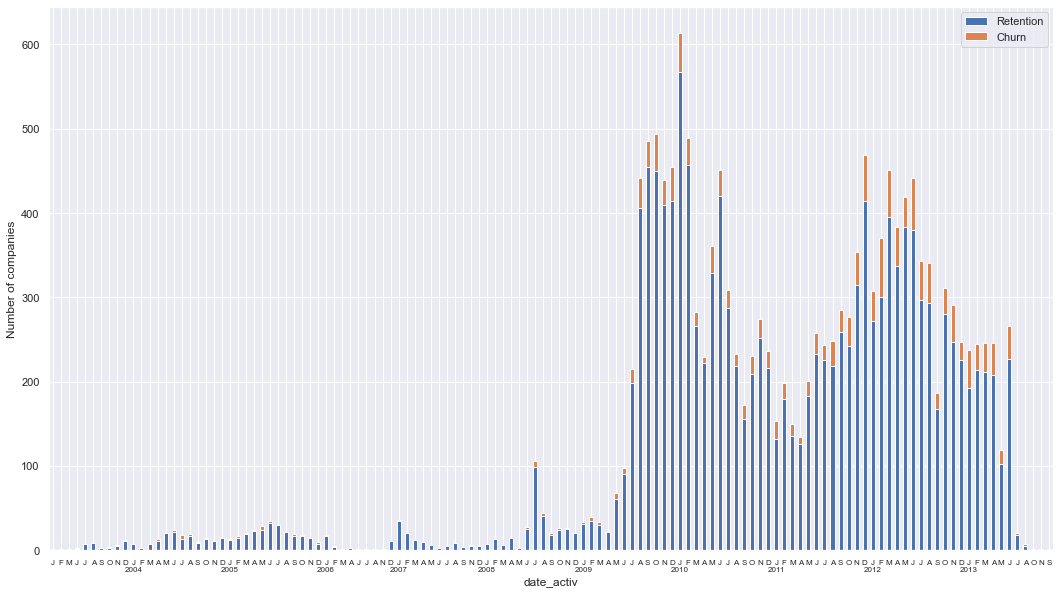

In [39]:
plot_dates(dates, "date_activ", fontsize_=8)

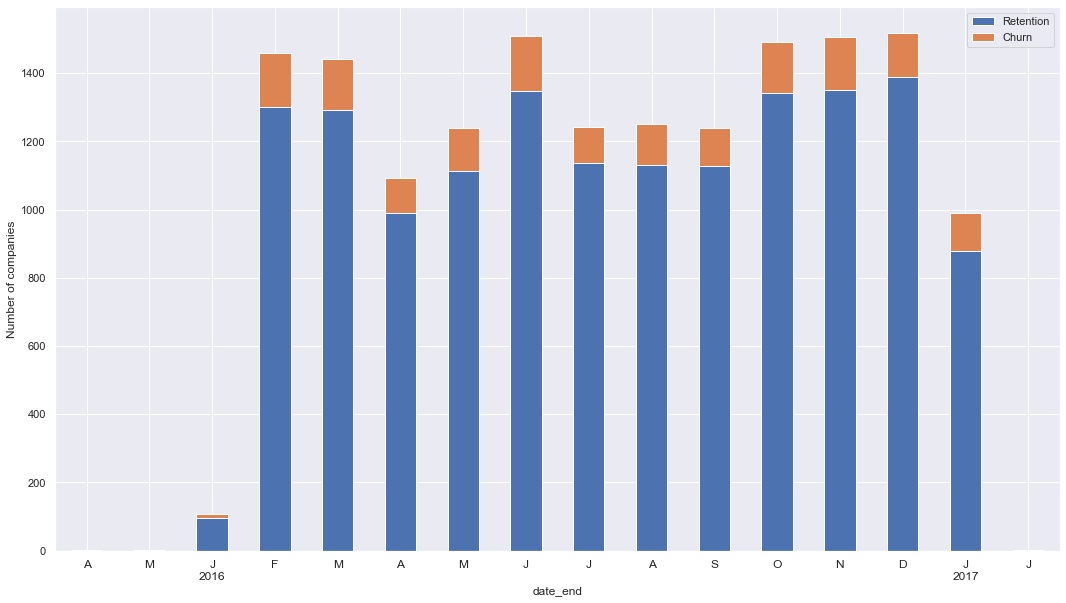

In [40]:
plot_dates(dates, "date_end")

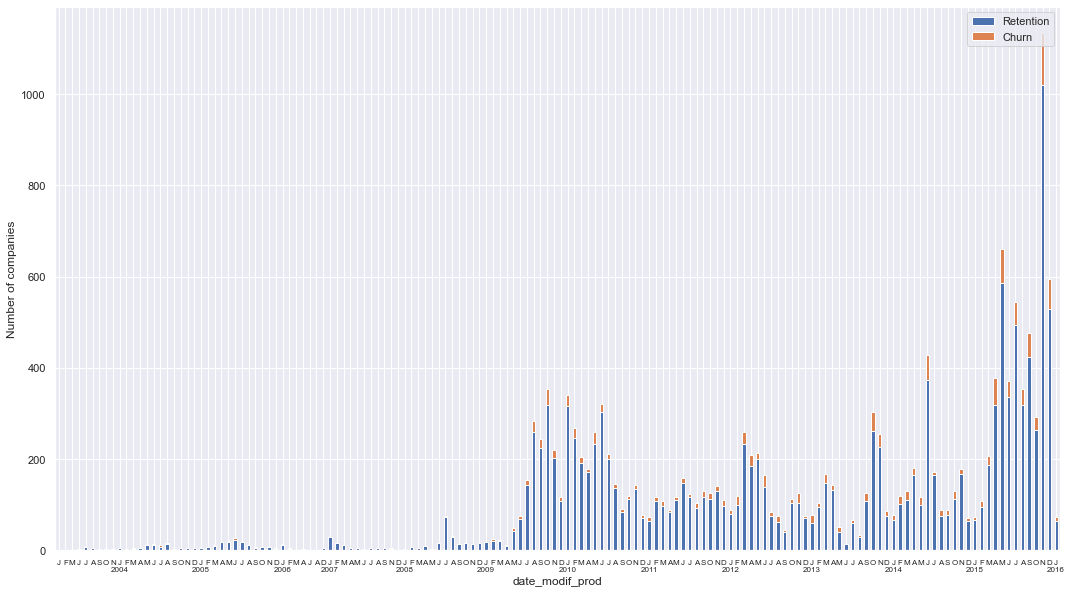

In [41]:
plot_dates(dates, "date_modif_prod", fontsize_=8)

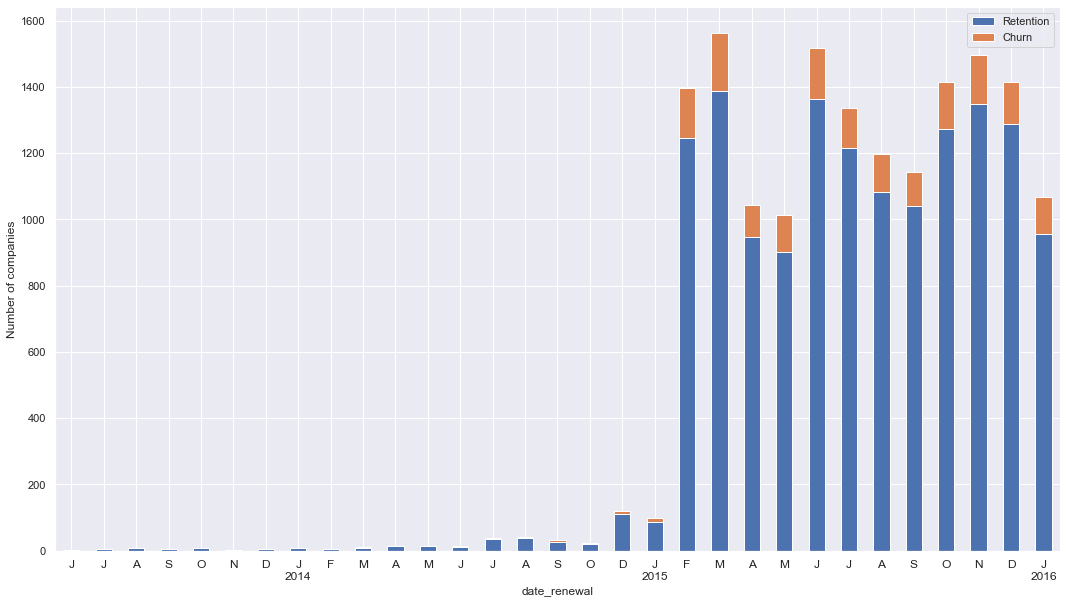

In [42]:
plot_dates(dates, "date_renewal")

We can visualize the distribution of churned companies according to the date. However, this does not provide us with any useful insight. 

## Forecast

In [43]:
forecast = train[["id","forecast_base_bill_ele","forecast_base_bill_year", "forecast_bill_12m","forecast_cons","forecast_cons_12m",
"forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m", "forecast_price_energy_p1","forecast_price_energy_p2",
"forecast_price_pow_p1","churn"]]


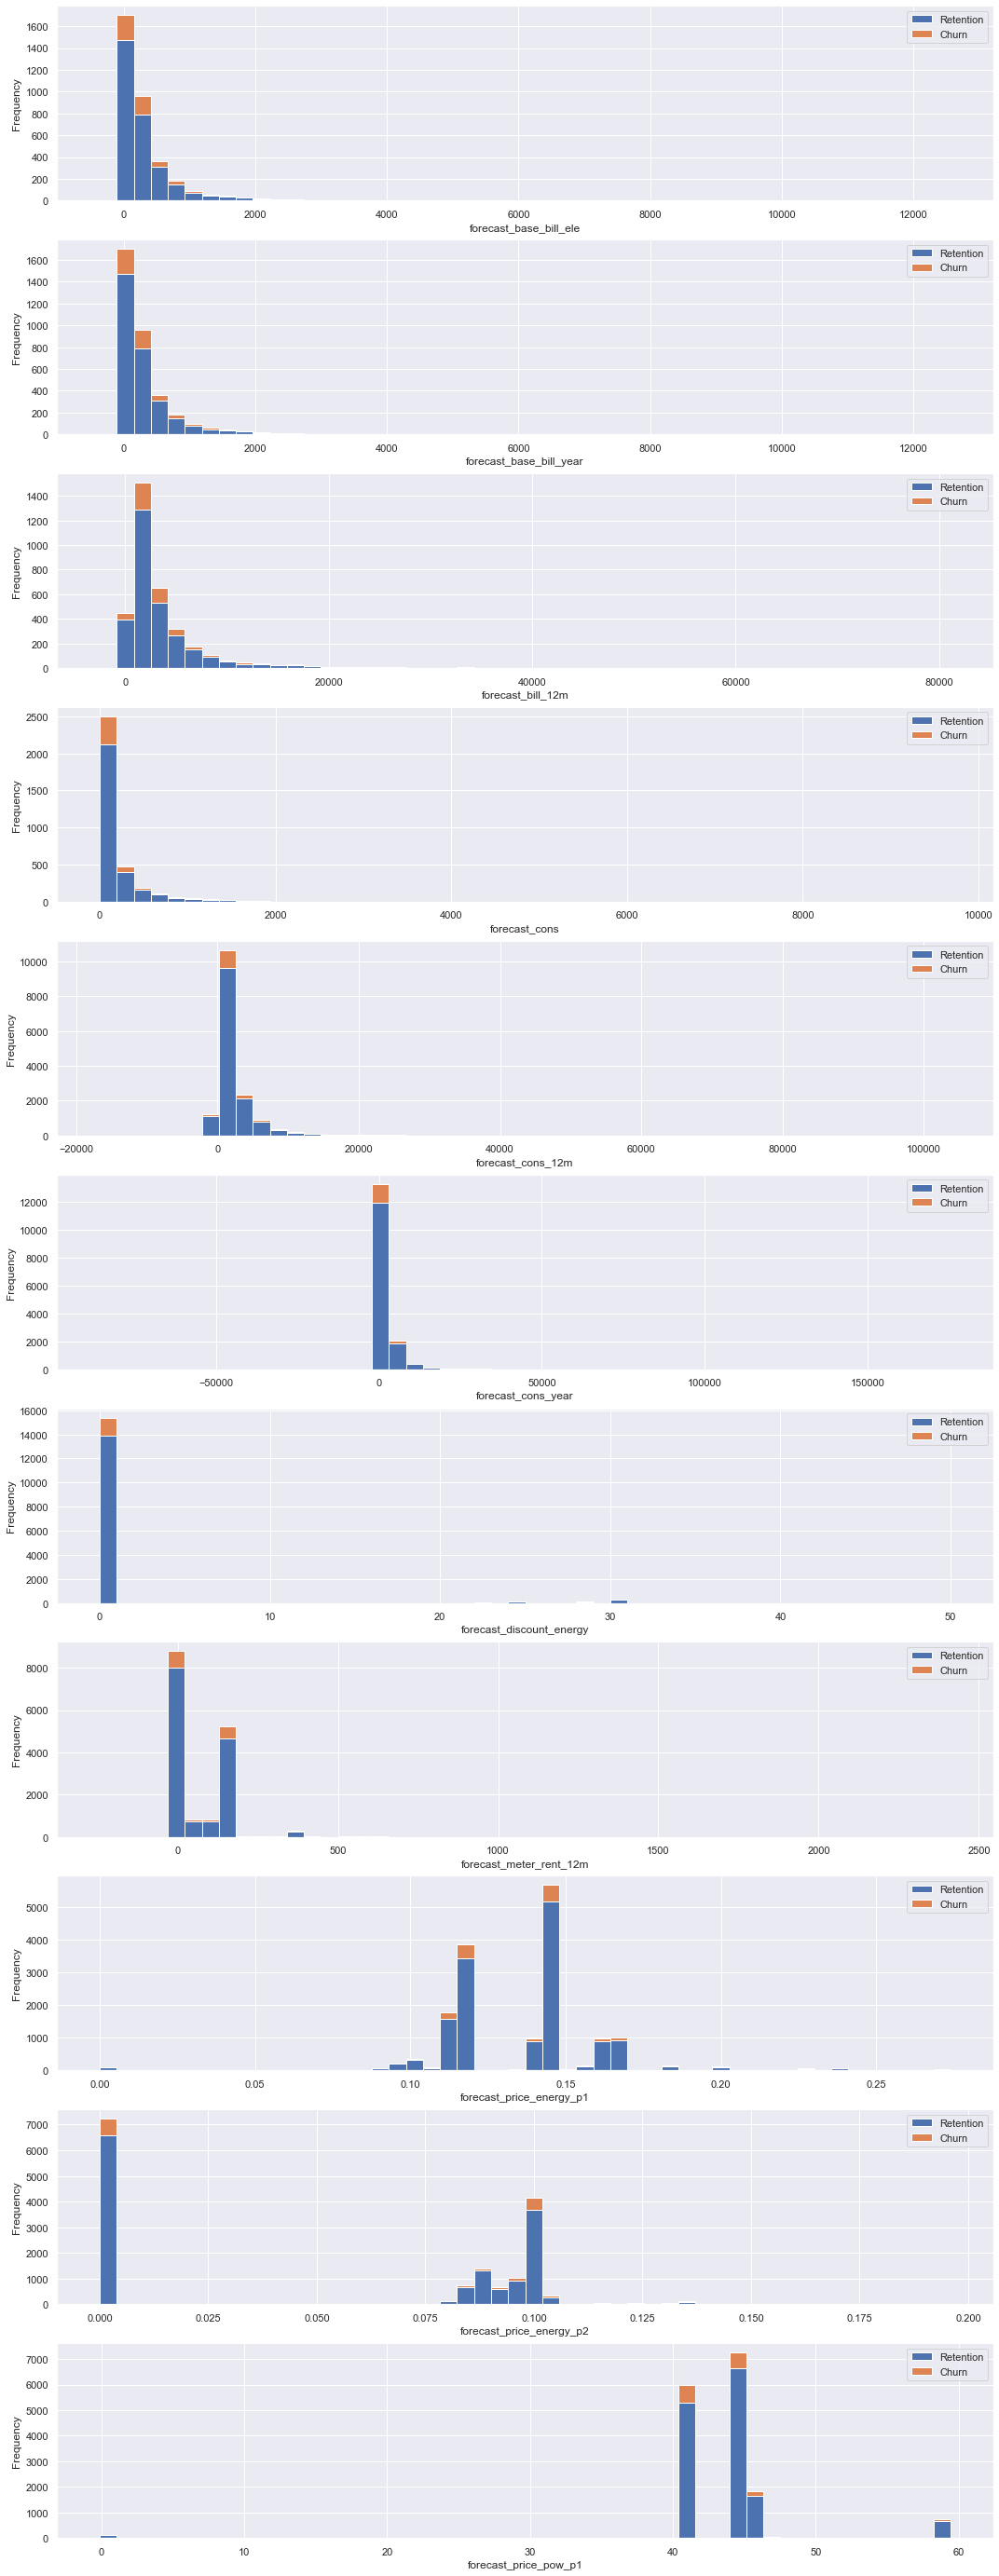

In [44]:
fig, axs = plt.subplots(nrows=11, figsize=(18,50))
# Plot histogram
plot_distribution(train, "forecast_base_bill_ele", axs[0]) 
plot_distribution(train, "forecast_base_bill_year", axs[1])
plot_distribution(train, "forecast_bill_12m", axs[2])
plot_distribution(train, "forecast_cons", axs[3])
plot_distribution(train, "forecast_cons_12m", axs[4]) 
plot_distribution(train, "forecast_cons_year", axs[5])
plot_distribution(train, "forecast_discount_energy", axs[6]) 
plot_distribution(train, "forecast_meter_rent_12m", axs[7]) 
plot_distribution(train, "forecast_price_energy_p1", axs[8]) 
plot_distribution(train, "forecast_price_energy_p2", axs[9]) 
plot_distribution(train, "forecast_price_pow_p1", axs[10])


Similarly to the consumption plots, we can observe that a lot of the variables are highly skewed to the right, creating a very long tail on the higher values.

The skewness should be corrected.


### Contract type (electricity, gas)

In [45]:
contract_type = train[["id", "has_gas", "churn"]]

In [46]:
contract = contract_type.groupby([contract_type["churn"],
contract_type["has_gas"]])["id"].count().unstack(level=0)


In [47]:
contract_percentage = (contract.div(contract.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)

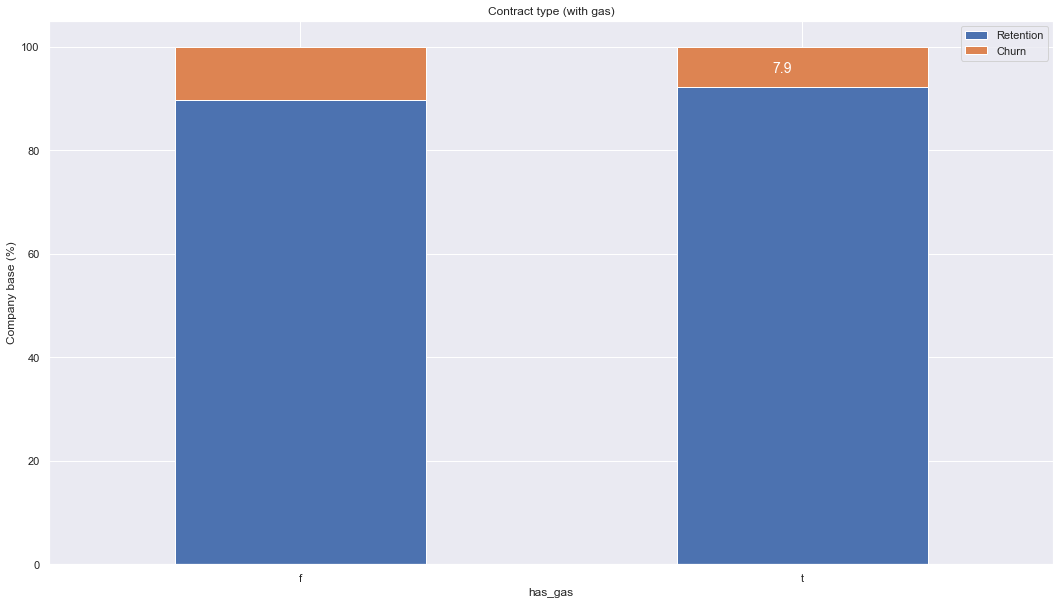

In [48]:
plot_stacked_bars(contract_percentage, "Contract type (with gas)")

### Margins

In [49]:
margin = train[["id","margin_gross_pow_ele","margin_net_pow_ele","net_margin"]]

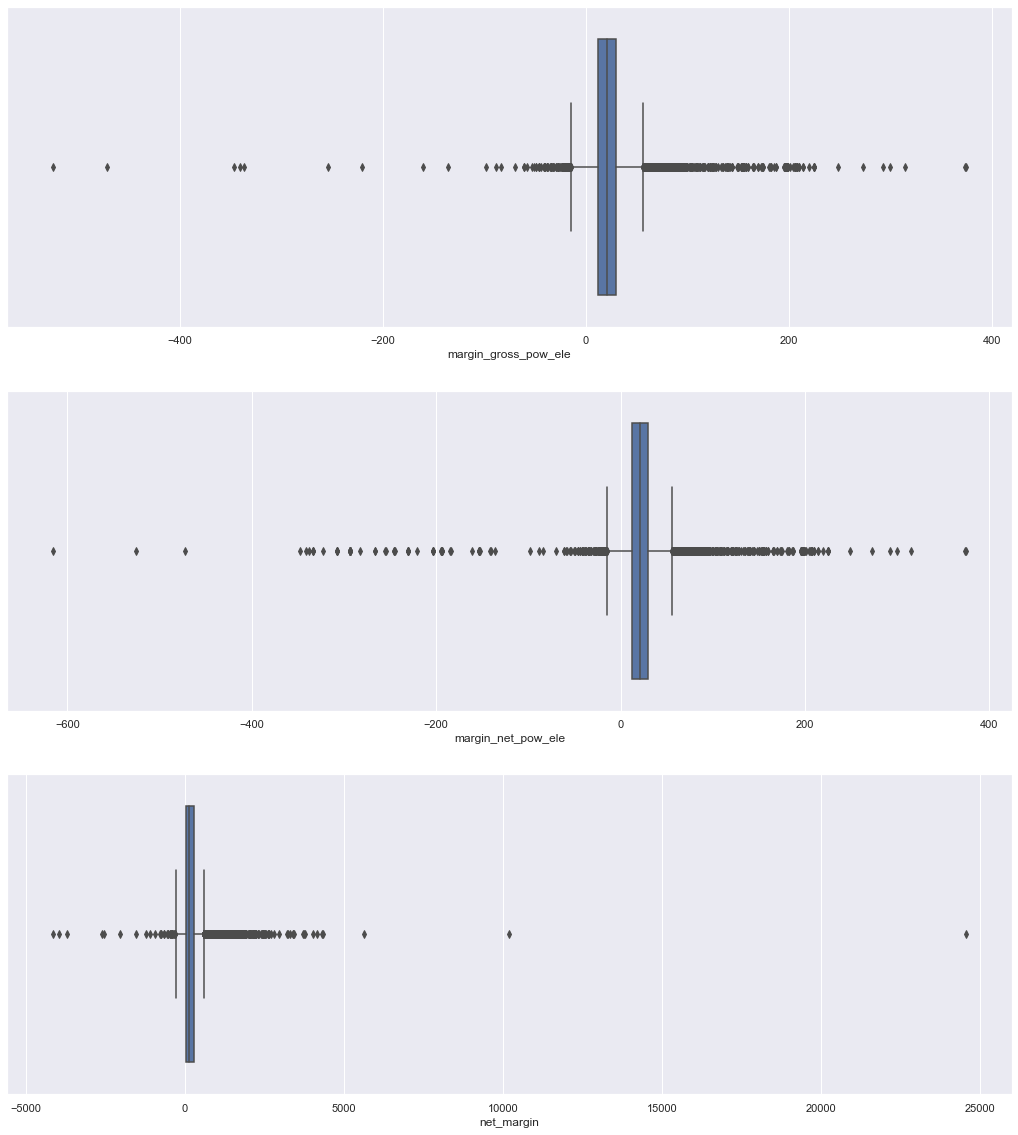

In [50]:
fig, axs = plt.subplots(nrows=3, figsize=(18,20))
# Plot histogram
sns.boxplot(margin["margin_gross_pow_ele"], ax=axs[0]) 
sns.boxplot(margin["margin_net_pow_ele"],ax=axs[1])
sns.boxplot(margin["net_margin"], ax=axs[2])

# Remove scientific notation
axs[0].ticklabel_format(style='plain', axis='x') 
axs[1].ticklabel_format(style='plain', axis='x') 
axs[2].ticklabel_format(style='plain', axis='x') 
plt.show()


Obseravtions
there are a few outliers according to the graphs.

### Subscribed power

In [51]:
power = train[["id","pow_max", "churn"]].fillna(0)

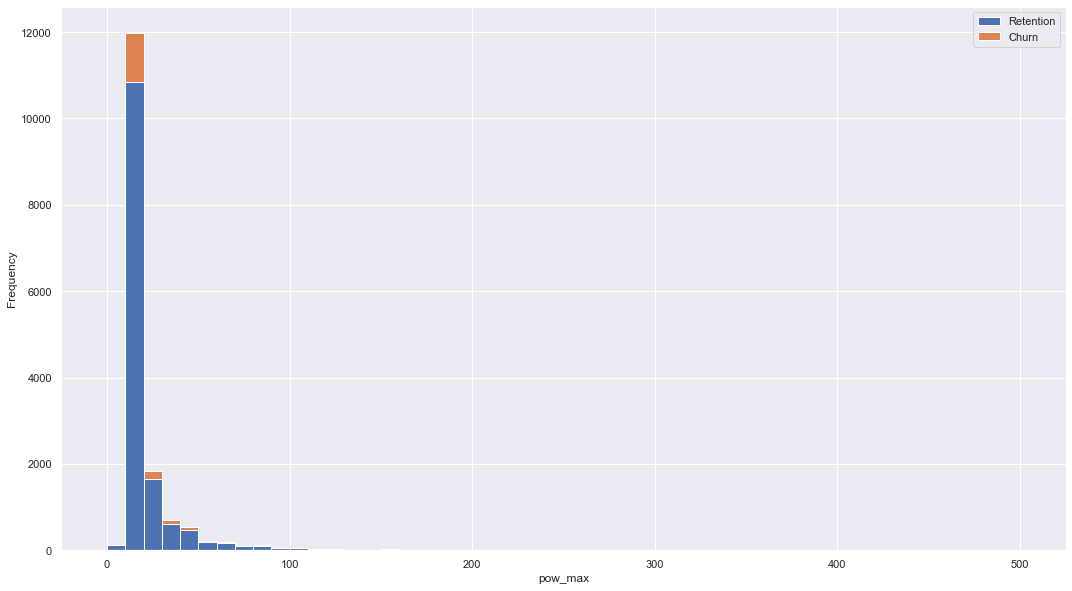

In [52]:
fig, axs = plt.subplots(nrows=1, figsize=(18,10)) 
plot_distribution(power, "pow_max", axs)

### Others

In [53]:
others = train[["id","nb_prod_act","num_years_antig", "origin_up", "churn"]]

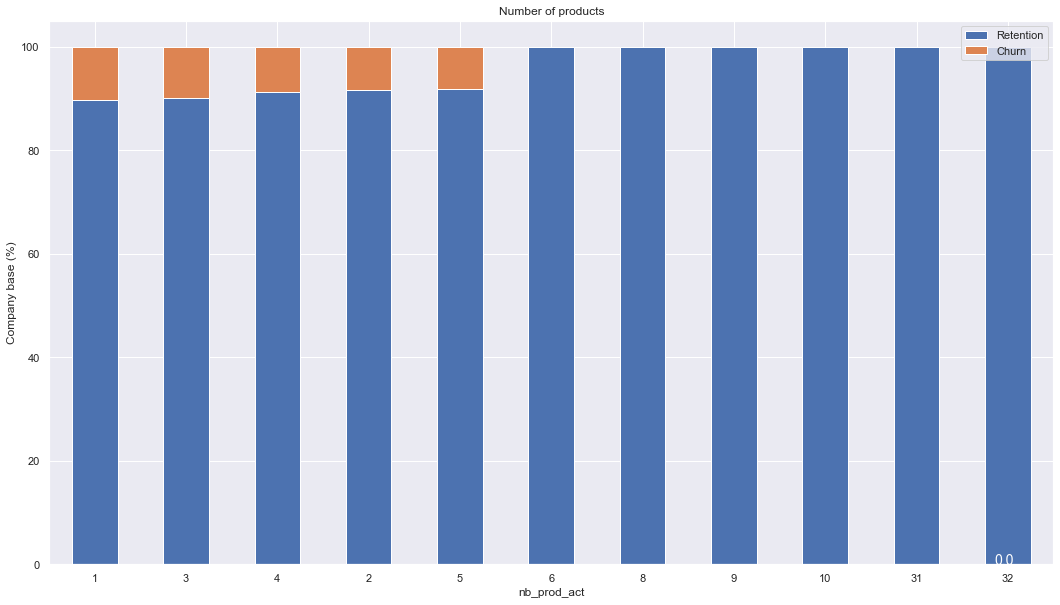

In [54]:
products = others.groupby([others["nb_prod_act"],others["churn"]])["id"].count().unstack(level=1)
products_percentage = (products.div(products.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False) 
plot_stacked_bars(products_percentage, "Number of products")


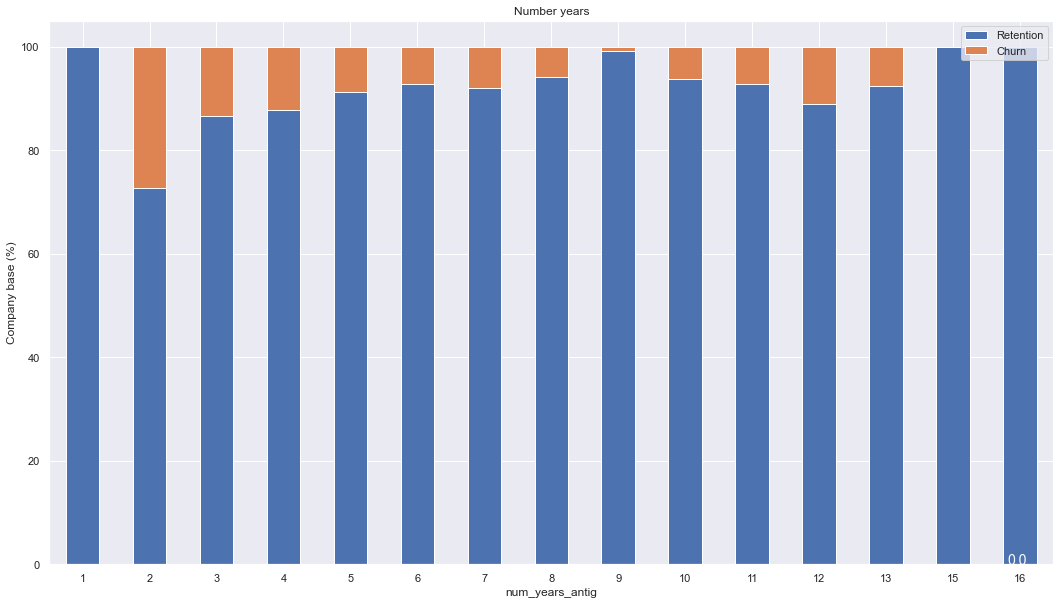

In [55]:
years_antig = others.groupby([others["num_years_antig"],others["churn"]])["id"].count().unstack(level=1) 
years_antig_percentage = (years_antig.div(years_antig.sum(axis=1), axis=0)*100)
plot_stacked_bars(years_antig_percentage, "Number years")


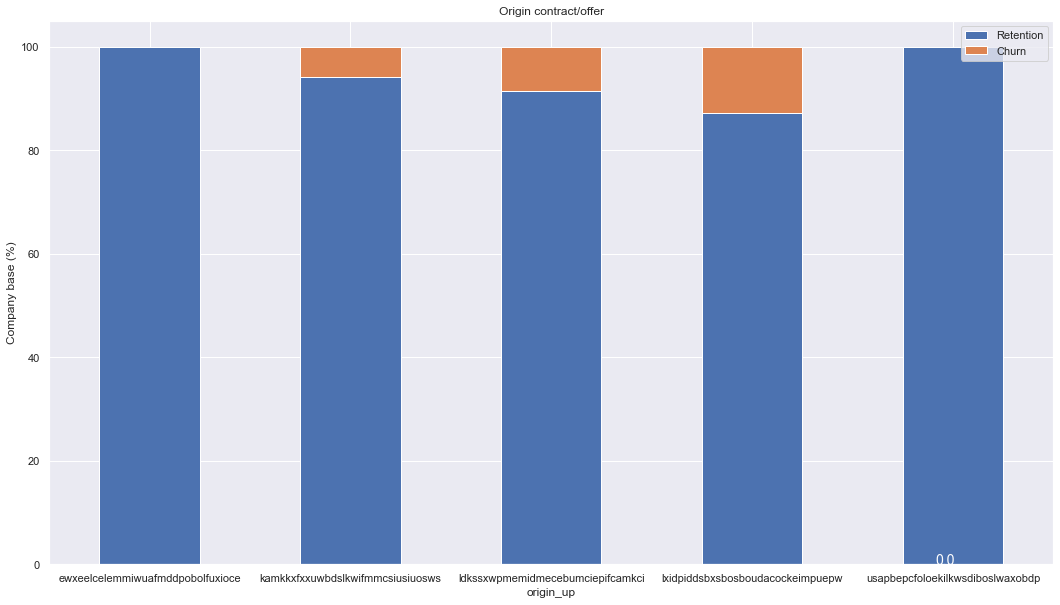

In [56]:
origin = others.groupby([others["origin_up"],others["churn"]])["id"].count().unstack(level=1) 
origin_percentage = (origin.div(origin.sum(axis=1), axis=0)*100)
plot_stacked_bars(origin_percentage, "Origin contract/offer")


## 4. Data cleaning

### Missing data


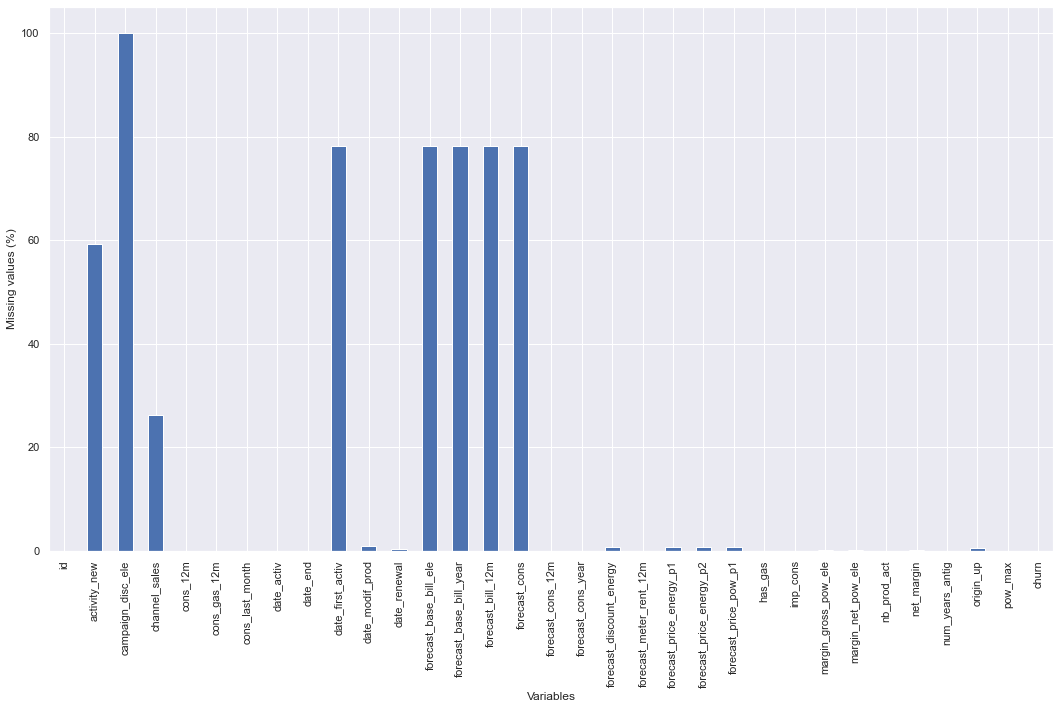

In [57]:
# Plot missing data
(train.isnull().sum()/len(train.index)*100).plot(kind="bar", figsize=(18,10))

# Set axis labels
plt.xlabel("Variables")
plt.ylabel("Missing values (%)") 
plt.show()


For simplicity we will remove the variables with more than 60% of the values missing.

*We might re-use some of these variables if our model is not good enough


In [58]:
train.drop(columns=["campaign_disc_ele", "date_first_activ",
"forecast_base_bill_ele","forecast_base_bill_year", "forecast_bill_12m", "forecast_cons"], inplace=True)


In [59]:
train.head()


,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
3,764c75f661154dac3a6c254cd082ea7d,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
4,bba03439a292a1e166f80264c16191cb,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0


In [60]:
pd.DataFrame({"Dataframe columns": train.columns})

,Dataframe columns
0,id
1,activity_new
2,channel_sales
3,cons_12m
4,cons_gas_12m
5,cons_last_month
6,date_activ
7,date_end
8,date_modif_prod
9,date_renewal


### Duplicates

In [61]:
# the  .duplicated()function in pandas displays duplicates.
train[train.duplicated()]


,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn


In [62]:
train[train.duplicated()]

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn


## 5. Formatting data

### Missing dates
There could be several ways in which we could deal with the missing dates.

One way, we could "engineer" the dates from known values. For example, the date_renewal is usually the same date as the  date_modif_prod
but one year ahead.

The simplest way, we will replace the missing values with the median (the most frequent date). For numerical values, the built-in function .median()
can be used, but this will not work for dates or strings, so we will use a workaround using .value counts()


In [63]:
train.loc[train["date_modif_prod"].isnull(),"date_modif_prod"] = train["date_modif_prod"].value_counts().index[0] 
train.loc[train["date_end"].isnull(),"date_end"] = train["date_end"].value_counts().index[0]
train.loc[train["date_renewal"].isnull(),"date_renewal"] = train["date_renewal"].value_counts().index[0]


Although we are directly replacing the values in here, it is usually best practice to make a binary ﬂag that indicates when data is missing because this is informative in itself.

### Missing data

We might have some prices missing for some companies and months

In [64]:
missing_data_percentage = history_data.isnull().sum()/len(history_data.index)*100

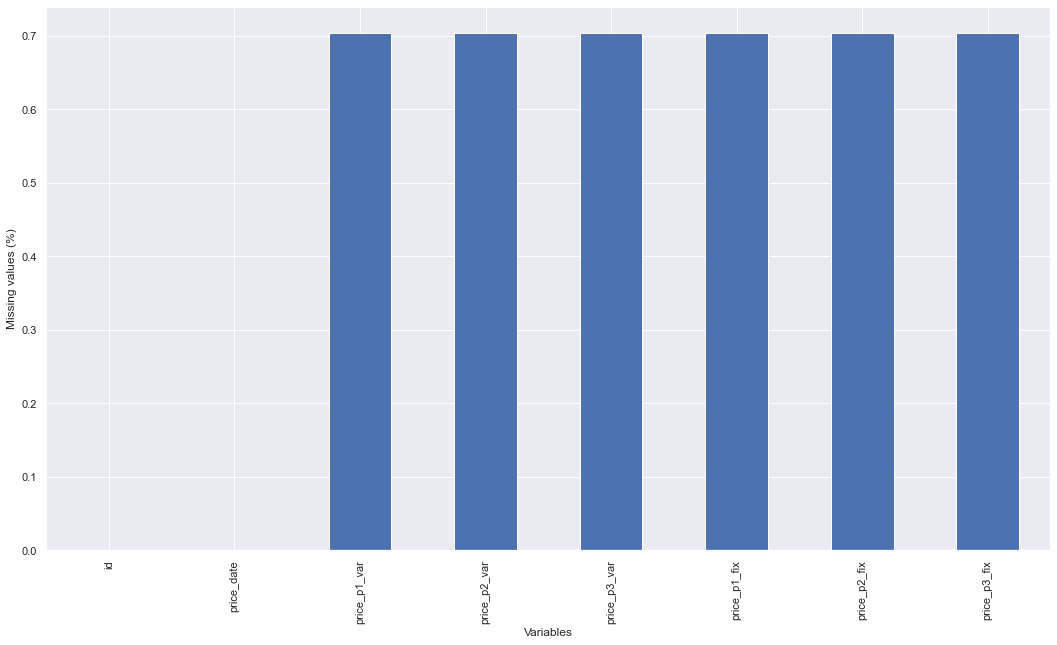

In [65]:
missing_data_percentage.plot(kind="bar", figsize=(18,10))
# Set labels
plt.xlabel("Variables")
plt.ylabel("Missing values (%)") 

plt.show()


There is not much data missing. Instead of removing the entries that are empty we will simply substitute them with the median .

mean,median or mode could be use to populate missing data.


In [66]:
history_data[history_data.isnull().any(axis=1)]

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
75,ef716222bbd97a8bdfcbb831e3575560,2015-04-01,NaN,NaN,NaN,NaN,NaN,NaN
221,0f5231100b2febab862f8dd8eaab3f43,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
377,2f93639de582fadfbe3e86ce1c8d8f35,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
413,f83c1ab1ca1d1802bb1df4d72820243c,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
461,3076c6d4a060e12a049d1700d9b09cf3,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
192767,2dc2c9a9f6e6896d9a07d7bcbb9d0ce9,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
192788,e4053a0ad6c55e4665e8e9adb9f75db5,2015-03-01,NaN,NaN,NaN,NaN,NaN,NaN
192875,1a788ca3bfb16ce443dcf7d75e702b5d,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
192876,1a788ca3bfb16ce443dcf7d75e702b5d,2015-07-01,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
history_data.loc[history_data["price_p1_var"].isnull(),"price_p1_var"] = history_data["price_p1_var"].median()
history_data.loc[history_data["price_p2_var"].isnull(),"price_p2_var"] = history_data["price_p2_var"].median() 
history_data.loc[history_data["price_p3_var"].isnull(),"price_p3_var"] = history_data["price_p3_var"].median()
history_data.loc[history_data["price_p1_fix"].isnull(),"price_p1_fix"] = history_data["price_p1_fix"].median() 
history_data.loc[history_data["price_p2_fix"].isnull(),"price_p2_fix"] = history_data["price_p2_fix"].median() 
history_data.loc[history_data["price_p3_fix"].isnull(),"price_p3_fix"] = history_data["price_p3_fix"].median()

In [68]:
history_data.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


### Formatting dates (train data)

In order to use the dates in our churn prediction model we are going to change the representation of these dates. Instead of using the date itself, we will be transforming it in number of months. In order to make this transformation we need to change the dates to datetime and create a
reference date which will be January 2016 (see notes)



In [69]:
# Transform date columns to datetime type
train["date_activ"] = pd.to_datetime(train["date_activ"], format='%Y-%m-%d') 
train["date_end"] = pd.to_datetime(train["date_end"], format='%Y-%m-%d')
train["date_modif_prod"] = pd.to_datetime(train["date_modif_prod"], format='%Y-%m-%d') 
train["date_renewal"] = pd.to_datetime(train["date_renewal"], format='%Y-%m-%d')


### Formating dates (history data)

In [70]:
history_data["price_date"] = pd.to_datetime(history_data["price_date"], format='%Y-%m-%d')

<AxesSubplot:xlabel='imp_cons'>

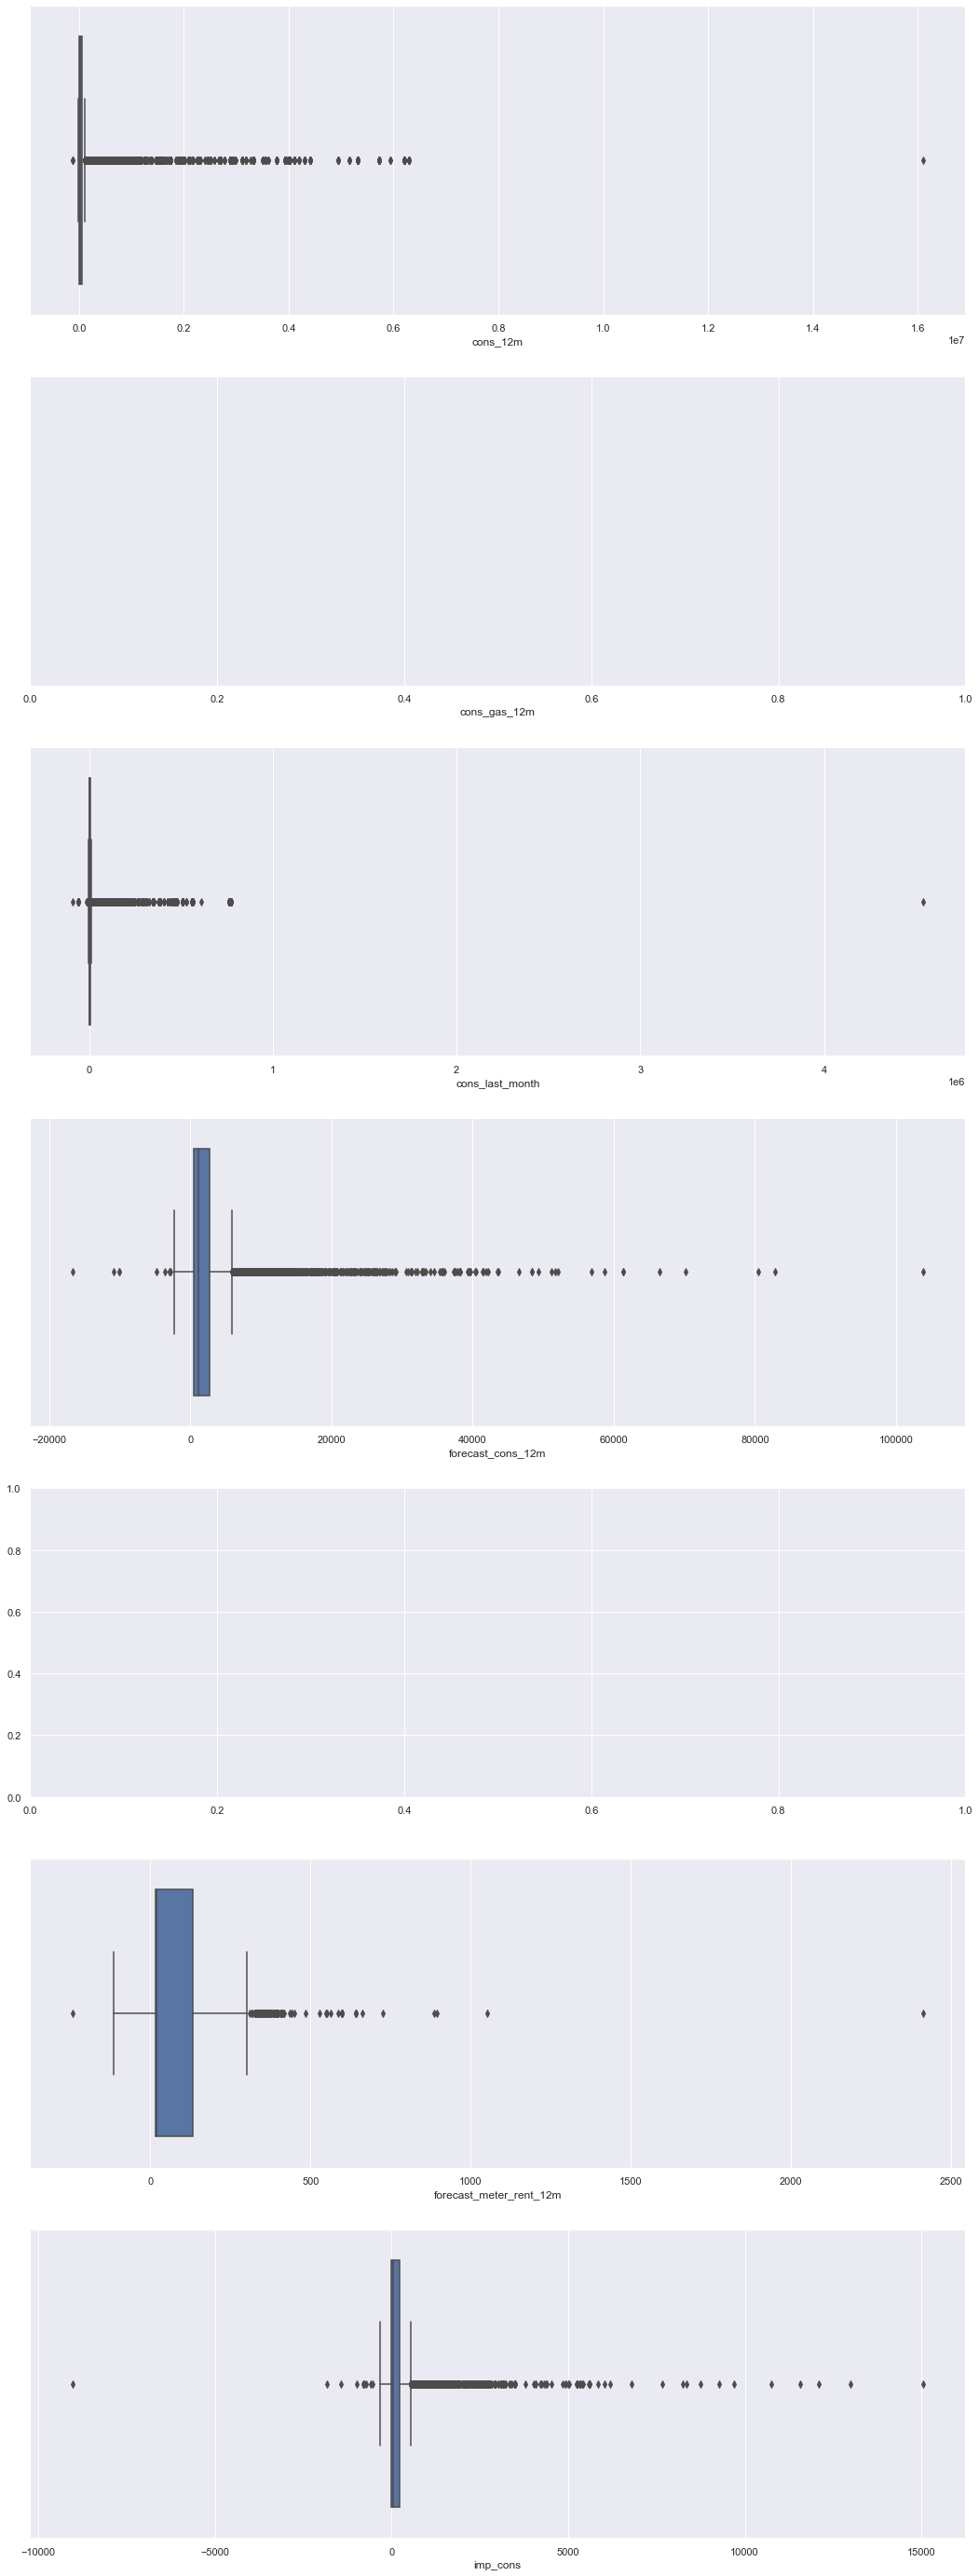

In [71]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))
# Plot boxplots

sns.boxplot((train["cons_12m"].dropna()), ax=axs[0])
sns.boxplot((train[train["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1]) 
sns.boxplot((train["cons_last_month"].dropna()), ax=axs[2])
sns.boxplot((train["forecast_cons_12m"].dropna()), ax=axs[3])
#sns.boxplot((train["forecast_cons_year"].dropna()), ax=axs[4])
sns.boxplot((train["forecast_meter_rent_12m"].dropna()), ax=axs[5]) 
sns.boxplot((train["imp_cons"].dropna()), ax=axs[6])


### Negative data
price exploration.


In [84]:
history_data.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


We can see that there are negative values for price_p1_fix , price_p2_fix and price_p3_fix .

Further exploring on those we can see there are only about 10 entries which are negative. This is more likely to be due to corrupted data rather than a "price discount".

We will replace the negative values with the median (most frequent value)


In [72]:
#history_data[(history_data.price_p1_fix < 0) | (history_data.price_p2_fix < 0) | (history_data.price_p3_fix < 0)

In [73]:
history_data.loc[history_data["price_p1_fix"] < 0,"price_p1_fix"] = history_data["price_p1_fix"].median() 
history_data.loc[history_data["price_p2_fix"] < 0,"price_p2_fix"] = history_data["price_p2_fix"].median() 
history_data.loc[history_data["price_p3_fix"] < 0,"price_p3_fix"] = history_data["price_p3_fix"].median()

In [74]:
#processed_train_data =train.to_csv('processed_train_data.csv')
#processed_historical_data= history_data.to_csv('processed_historical_data')
 

## 8. Pickling

Pickling is useful for applications where we need some degree of persistency in our data. Our program's state data can be saved to disk, so we can continue working on it later onMake directory processed_data if it does not exist already

if not os.path.exists(os.path.join("..", "processed_data")): os.makedirs(os.path.join("..", "processed_data"))

In [75]:
#PICKLE_TRAIN_DIR = os.path.join("..", "processed_data", "train_data.pkl")
#PICKLE_HISTORY_DIR = os.path.join("..", "processed_data", "history_data.pkl")


In [76]:
#pd.to_pickle(train, PICKLE_TRAIN_DIR)
#pd.to_pickle(history_data, PICKLE_HISTORY_DIR)


### TO BE CONTINUED

# BCG FEATURE ENGINNERING TASK 3

### Feature engineering
0.	Package Import and Data Loading
1.	Feature engineering
2.	Variable correlation
3.	Removing outliers
4.	Pickling



## 0. Import packages

Since we have the consumption data for each of the companies for the year 2015, we will create new features using the average of the year, the last six months, and the last three months to our model.

In [77]:
mean_year = history_data.groupby(["id"]).mean().reset_index()

In [78]:
mean_6m = history_data[history_data["price_date"] > "2015-06-01"].groupby(["id"]).mean().reset_index()

In [79]:
mean_3m = history_data[history_data["price_date"] > "2015-10-01"].groupby(["id"]).mean().reset_index()

In [80]:
### Combine them in a single dataframe

In [82]:
mean_year = mean_year.rename(index=str, columns={"price_p1_var": "mean_year_price_p1_var",
"price_p2_var": "mean_year_price_p2_var", "price_p3_var": "mean_year_price_p3_var", "price_p1_fix": "mean_year_price_p1_fix", "price_p2_fix": "mean_year_price_p2_fix",
"price_p3_fix": "mean_year_price_p3_fix",})
mean_year["mean_year_price_p1"] = mean_year["mean_year_price_p1_var"] + mean_year["mean_year_price_p1_fix"] 
mean_year["mean_year_price_p2"] = mean_year["mean_year_price_p2_var"] + mean_year["mean_year_price_p2_fix"] 
mean_year["mean_year_price_p3"] = mean_year["mean_year_price_p3_var"] + mean_year["mean_year_price_p3_fix"]


In [83]:
mean_6m = mean_6m.rename(index=str, columns={"price_p1_var": "mean_6m_price_p1_var",
"price_p2_var": "mean_6m_price_p2_var", "price_p3_var": "mean_6m_price_p3_var", "price_p1_fix": "mean_6m_price_p1_fix", "price_p2_fix": "mean_6m_price_p2_fix",
"price_p3_fix": "mean_6m_price_p3_fix",})
mean_6m["mean_6m_price_p1"] = mean_6m["mean_6m_price_p1_var"] + mean_6m["mean_6m_price_p1_fix"] 
mean_6m["mean_6m_price_p2"] = mean_6m["mean_6m_price_p2_var"] + mean_6m["mean_6m_price_p2_fix"] 
mean_6m["mean_6m_price_p3"] = mean_6m["mean_6m_price_p3_var"] + mean_6m["mean_6m_price_p3_fix"]


In [84]:
mean_3m = mean_3m.rename(index=str, columns={"price_p1_var": "mean_3m_price_p1_var",
"price_p2_var": "mean_3m_price_p2_var", "price_p3_var": "mean_3m_price_p3_var", "price_p1_fix": "mean_3m_price_p1_fix", "price_p2_fix": "mean_3m_price_p2_fix",
"price_p3_fix": "mean_3m_price_p3_fix",})
mean_3m["mean_3m_price_p1"] = mean_3m["mean_3m_price_p1_var"] + mean_3m["mean_3m_price_p1_fix"]
mean_3m["mean_3m_price_p2"] = mean_3m["mean_3m_price_p2_var"] + mean_3m["mean_3m_price_p2_fix"] 
mean_3m["mean_3m_price_p3"] = mean_3m["mean_3m_price_p3_var"] + mean_3m["mean_3m_price_p3_fix"]


Now we will merge them into a single dataframe

the mean_6m and mean_3m are under probability of being able to help the prediction model. We will see below the variables are also highly correlated to actually using only the mean_year is OK


In [85]:
#features = pd.merge(mean_year,mean_6m, on="id") #features = pd.merge(features,mean_3m, on="id") features = mean_year

In [ ]:
Feature engineering
In the previous notebook we explored the data and made a deep dive into the churn by dates. Nonetheless, that exploration was quite shallow and did not provide us with any relevant insight.

What if we could create a new variable that could provide us more relevant insights?


In [ ]:
We will deﬁne a variable tenure = date_end - date_activ

In [ ]:
train["tenure"] = ((train["date_end"]-train["date_activ"])/ np.timedelta64(1, "Y")).astype(int)

In [ ]:
tenure = train[["tenure", "churn", "id"]].groupby(["tenure", "churn"])["id"].count().unstack(level=1) tenure_percentage = (tenure.div(tenure.sum(axis=1), axis=0)*100)

In [ ]:
tenure.plot(kind="bar",
figsize=(18,10), stacked=True,
rot=0,
title= "Tenure")

# Rename legend
plt.legend(["Retention", "Churn"], loc="upper right")
# Labels
plt.ylabel("No. of companies") plt.xlabel("No. of years")
plt.show()


In [ ]:
We can clearly that churn is very low for companies which joined recently or that have made the contract a long time ago. With the higher number of churners within the 3-7 years of tenure.

We will also transform the dates provided in such a way that we can make more sense out of those.


In [ ]:
months_activ : Number of months active until reference date (Jan 2016)

In [ ]:
months_to_end : Number of months of the contract left at reference date (Jan 2016)

In [ ]:
months_modif_prod : Number of months since last modiﬁcation at reference date (Jan 2016)

In [ ]:
months_renewal : Number of months since last renewal at reference date (Jan 2016)

In [ ]:
To create the month column we will follow a simple process:
    To create the month column we will follow a simple process:

1.	Substract the reference date and the column date
2.	Convert the timedelta in months
3.	Convert to integer (we are not interested in having decimal months)


In [ ]:
def convert_months(reference_date, dataframe, column): """
Input a column with timedeltas and return months """
time_delta = REFERENCE_DATE - dataframe[column]
months = (time_delta / np.timedelta64(1, "M")).astype(int)
return months


In [ ]:
# Create reference date as provided on the exercise statement
REFERENCE_DATE = datetime.datetime(2016,1,1)


In [ ]:
train["months_activ"] = convert_months(REFERENCE_DATE, train, "date_activ") train["months_to_end"] = -convert_months(REFERENCE_DATE, train, "date_end")
train["months_modif_prod"] = convert_months(REFERENCE_DATE, train, "date_modif_prod") train["months_renewal"] = convert_months(REFERENCE_DATE, train, "date_renewal")


In [ ]:
Let's see if we can get any insights

In [ ]:
def plot_churn_by_month(dataframe, column, fontsize_=11): """
Plot churn distribution by monthly variable """
temp = dataframe[[column, "churn", "id"]].groupby([column, "churn"])["id"].count().unstack(level=1) temp.plot(kind="bar",
figsize=(18,10), stacked=True,
rot=0,
title= column)

# Rename legend
plt.legend(["Retention", "Churn"], loc="upper right")
# Labels
plt.ylabel("No. of companies") plt.xlabel("No. of months")
# Set xlabel fontsize
plt.xticks(fontsize=fontsize_) plt.show()


In [ ]:
plot_churn_by_month(train, "months_activ", 7)

In [ ]:
plot_churn_by_month(train, "months_to_end")

In [ ]:
plot_churn_by_month(train, "months_modif_prod", 8)

In [ ]:
plot_churn_by_month(train, "months_renewal")

In [ ]:
Remove the date columns

In [ ]:
train.drop(columns=["date_activ", "date_end", "date_modif_prod", "date_renewal"],inplace=True)

In [ ]:
## Transforming boolean data
For the column has_gas, we will replace t for  True or  1 and  f for  False or  0 . This process is usually referred as  onehot encoding

In [ ]:
train["has_gas"]=train["has_gas"].replace(["t", "f"],[1,0])

In [ ]:
Categorical data and dummy variables

In [ ]:
When training our model we cannot use string data as such, so we will need to encode it into numerical data. The easiest method is mapping each category to an integer ( label encoding ) but this will not work because the model will misunderstand the data to be in some kind of order or hierarchy, 0 < 1 < 2 < 3 ...

For that reason we will use a method with  dummy variables or onehot encoder

In [ ]:
Categorical data channel_sales
What we are doing here relatively simple, we want to convert each category into a new dummy variable which will have 0 s and 1 s depending whether than entry belongs to that particular category or not

First of all let's replace the  Nan values with a string called  null_values_channel


In [ ]:
train["channel_sales"] = train["channel_sales"].fillna("null_values_channel")

In [ ]:
Now transform the channel_sales column into categorical data type

In [ ]:
# Transform to categorical data type
train["channel_sales"] = train["channel_sales"].astype("category")


In [ ]:
We want to see how many categories we will end up with

In [ ]:
pd.DataFrame({"Samples in category": train["channel_sales"].value_counts()})

In [ ]:
So that means we will create 8 different dummy variables . Each variable will become a different column.

In [ ]:
# Create dummy variables
categories_channel = pd.get_dummies(train["channel_sales"], prefix = "channel")


In [ ]:
# Rename columns for simplicity
categories_channel.columns = [col_name[:11] for col_name in categories_channel.columns]


In [ ]:
categories_channel.head(5)

In [ ]:
We will explain the concept of multicollinearity in the next section. Simply put, multicollinearity is when two or more independent variables in a regression are highly related to one another, such that they do not provide unique or independent information to the regression.
Multicollinearity can affect our models so we will remove one of the columns.


In [ ]:
categories_channel.drop(columns=["channel_nul"],inplace=True)

In [ ]:
Categorical data origin_up

First of all let's replace the  Nan values with a string called  null_values_origin


In [ ]:
train["origin_up"] = train["origin_up"].fillna("null_values_origin")

In [ ]:
Now transform the origin_up column into categorical data type

In [ ]:
train["origin_up"] = train["origin_up"].astype("category")

In [ ]:
We want to see how many categories we will end up with

In [ ]:
pd.DataFrame({"Samples in category": train["origin_up"].value_counts()})

In [ ]:
So that means we will create 8 different dummy variables . Each variable will become a different column.

In [ ]:
# Create dummy variables
categories_origin = pd.get_dummies(train["origin_up"], prefix = "origin")
# Rename columns for simplicity
categories_origin.columns = [col_name[:10] for col_name in categories_origin.columns]


In [ ]:
categories_origin.head(5)

In [ ]:
Finally remove one column to avoid the  dummy variable trap

In [ ]:
categories_origin.drop(columns=["origin_nul"],inplace=True)

In [ ]:
Categorical data - Feature engineering

In [ ]:
First of all let's replace the  Nan values with a string called  null_values_activity

In [ ]:
train["activity_new"] = train["activity_new"].fillna("null_values_activity")

In [ ]:
We want to see how many categories we will end up with

In [ ]:
categories_activity = pd.DataFrame({"Activity samples":train["activity_new"].value_counts()}) categories_activity

In [ ]:
As we can see below there are too many categories with very few number of samples. So we will replace any category with less than 75 samples as
null_values_category


In [ ]:
# Get the categories with less than 75 samples
to_replace = list(categories_activity[categories_activity["Activity samples"] <= 75].index)
# Replace them with `null_values_categories`
train["activity_new"]=train["activity_new"].replace(to_replace,"null_values_activity")


In [ ]:
# Create dummy variables
categories_activity = pd.get_dummies(train["activity_new"], prefix = "activity")
# Rename columns for simplicity
categories_activity.columns = [col_name[:12] for col_name in categories_activity.columns]


In [ ]:
categories_activity.head(5)

In [ ]:
categories_activity.drop(columns=["activity_nul"],inplace=True)

In [ ]:
Merge dummy variables to main dataframe

We will merge all the new categories into our main dataframe and remove the old categorical columns


In [ ]:
# Use common index to merge
train = pd.merge(train, categories_channel, left_index=True, right_index=True) train = pd.merge(train, categories_origin, left_index=True, right_index=True)
train = pd.merge(train, categories_activity, left_index=True, right_index=True)


In [ ]:
train.drop(columns=["channel_sales", "origin_up", "activity_new"],inplace=True)

In [ ]:
Log transformation
Remember from the previous exercise that a lot of the variables we are dealing with are highly skewed to the right.

Why is skewness relevant? Skewness is not "bad" per se. Nonetheless, some predective models make fundamental assumptions related to variables being "normally distributed". Hence, the model will perform poorly if the data is highly skewed.

There are several methods in which we can reduce skewness such as square root , cube root , and log . In this case, we will use a log transformation which is usually recommended for right skewed data.


In [ ]:
train.describe()

In [ ]:
Particularly relevant to look at the standard deviation std which is very very high for some variables. Log transformation does not work with negative data, so we will convert the negative values to NaN .

In [ ]:
Also we cannot apply a log transformation to 0 valued entries, so we will add a constant 1

In [ ]:
# Remove negative values
train.loc[train.cons_12m < 0,"cons_12m"] = np.nan
train.loc[train.cons_gas_12m < 0,"cons_gas_12m"] = np.nan
train.loc[train.cons_last_month < 0,"cons_last_month"] = np.nan
train.loc[train.forecast_cons_12m < 0,"forecast_cons_12m"] = np.nan train.loc[train.forecast_cons_year < 0,"forecast_cons_year"] = np.nan
train.loc[train.forecast_meter_rent_12m < 0,"forecast_meter_rent_12m"] = np.nan train.loc[train.imp_cons < 0,"imp_cons"] = np.nan


In [ ]:
# Apply log10 transformation
train["cons_12m"] = np.log10(train["cons_12m"]+1)
train["cons_gas_12m"] = np.log10(train["cons_gas_12m"]+1)
train["cons_last_month"] = np.log10(train["cons_last_month"]+1)
train["forecast_cons_12m"] = np.log10(train["forecast_cons_12m"]+1) train["forecast_cons_year"] = np.log10(train["forecast_cons_year"]+1)
train["forecast_meter_rent_12m"] = np.log10(train["forecast_meter_rent_12m"]+1) train["imp_cons"] = np.log10(train["imp_cons"]+1)


In [ ]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))
# Plot histograms
sns.distplot((train["cons_12m"].dropna()), ax=axs[0])
sns.distplot((train[train["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1]) sns.distplot((train["cons_last_month"].dropna()), ax=axs[2])
sns.distplot((train["forecast_cons_12m"].dropna()), ax=axs[3]) sns.distplot((train["forecast_cons_year"].dropna()), ax=axs[4])
sns.distplot((train["forecast_meter_rent_12m"].dropna()), ax=axs[5]) sns.distplot((train["imp_cons"].dropna()), ax=axs[6])
plt.show()


In [ ]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))
# Plot boxplots
sns.boxplot((train["cons_12m"].dropna()), ax=axs[0])
sns.boxplot((train[train["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1]) sns.boxplot((train["cons_last_month"].dropna()), ax=axs[2])
sns.boxplot((train["forecast_cons_12m"].dropna()), ax=axs[3]) sns.boxplot((train["forecast_cons_year"].dropna()), ax=axs[4])
sns.boxplot((train["forecast_meter_rent_12m"].dropna()), ax=axs[5]) sns.boxplot((train["imp_cons"].dropna()), ax=axs[6])
plt.show()


In [ ]:
train.describe()	

In [ ]:
The distributions look much closer to normal distributions now! Notice how the standard deviation std has changed.
From the boxplots we can still see some values are quite far from the range ( outliers ). We will deal with them later.


In [ ]:
2.High correlation variables
Calculate the correlation of the variables

In [ ]:
# Calculate correlation of variables
correlation = features.corr()


In [ ]:
# Plot correlation
plt.figure(figsize=(19,15))
sns.heatmap(correlation, xticklabels=correlation.columns.values,
yticklabels=correlation.columns.values, annot = True, annot_kws={'size':10})
# Axis ticks size
plt.xticks(fontsize=10) plt.yticks(fontsize=10) plt.show()


In [ ]:
We can remove highly correlated variables.

Multicollinearity happens when one predictor variable in a multiple regression model can be linearly predicted from the others with a high degree of accuracy. This can lead to skewed or misleading results. Luckily, decision trees and boosted trees algorithms are immune to multicollinearity by nature. When they decide to split, the tree will choose only one of the perfectly correlated features. However, other algorithms like Logistic Regression or Linear Regression are not immune to that problem and should be ﬁxed before training the model.


In [ ]:
# Calculate correlation of variables
correlation = train.corr()


In [ ]:
# Plot correlation
plt.figure(figsize=(20,18))
sns.heatmap(correlation, xticklabels=correlation.columns.values,
yticklabels=correlation.columns.values, annot = True, annot_kws={'size':10})
# Axis ticks size
plt.xticks(fontsize=10) plt.yticks(fontsize=10) plt.show()


In [ ]:
As expected, num_years_antig has a high correlation with months_activ (it provides us the same information). We can remove variables with very high correlation.

In [ ]:
train.drop(columns=["num_years_antig", "forecast_cons_year"],inplace=True)

In [ ]:
3.Removing outliers

In [ ]:
As we identiﬁed during the exploratory phase, the consumption data has several outliers. We are going to remove those outliers

What are the criteria to identify an outlier?

The most common way to identify an outlier are:


In [ ]:
1. Data point that falls outside of 1.5 times of an interquartile range above the 3rd quartile and below the 1st quartile 2. Data point that falls outside of 3 standard deviations.

In [ ]:
Once, we have identiﬁed the outlier, What do we do with the outliers?

There are several ways to handle with those outliers such as removing them (this works well for massive datasets) or replacing them with sensible data (works better when the dataset is not that big).

We will replace the outliers with the mean (average of the values excluding outliers).


In [ ]:
def replace_outliers_z_score(dataframe, column, Z=3): """
Replace outliers with the mean values using the Z score. Nan values are also replaced with the mean values.

Parameters

dataframe : pandas dataframe
Contains the data where the outliers are to be found column : str
Usually a string with the name of the column Returns
Dataframe
With outliers under the lower and above the upper bound removed
"""
from scipy.stats import zscore

df = dataframe.copy(deep=True)
df.dropna(inplace=True, subset=[column])

# Calculate mean without outliers
df["zscore"] = zscore(df[column])
mean_ = df[(df["zscore"] > -Z) & (df["zscore"] < Z)][column].mean()

# Replace with mean values

dataframe[column] = dataframe[column].fillna(mean_) dataframe["zscore"] = zscore(dataframe[column])
no_outliers = dataframe[(dataframe["zscore"] < -Z) | (dataframe["zscore"] > Z)].shape[0] dataframe.loc[(dataframe["zscore"] < -Z) | (dataframe["zscore"] > Z),column] = mean_

# Print message
print("Replaced:", no_outliers, " outliers in ", column)
return dataframe.drop(columns="zscore")


In [ ]:
for c in features.columns:
if c != "id":
features = replace_outliers_z_score(features,c
Replaced: 276 outliers in mean_year_price_p1_var Replaced: 0  outliers in mean_year_price_p2_var
Replaced: 0  outliers in mean_year_price_p3_var
Replaced: 120 outliers in mean_year_price_p1_fix Replaced: 0  outliers in mean_year_price_p2_fix
Replaced: 0 outliers in mean_year_price_p3_fix Replaced: 122  outliers in mean_year_price_p1
Replaced: 0 outliers in mean_year_price_p2 Replaced: 0 outliers in mean_year_price_p3


In [ ]:
features.reset_index(drop=True, inplace=True)

In [ ]:
As we identiﬁed during the exploratory phase, and when carrying out the log transformation , the dataset has several outliers.

In [ ]:
What are the criteria to identify an outlier?

The most common way to identify an outlier are:
1. Data point that falls outside of 1.5 times of an interquartile range above the 3rd quartile and below the 1st quartile
2. Data point that falls outside of 3 standard deviations.

In [ ]:
Once, we have identiﬁed the outlier, What do we do with the outliers?

There are several ways to handle with those outliers such as removing them (this works well for massive datasets) or replacing them with sensible data (works better when the dataset is not that big).

We will replace the outliers with the mean (average of the values excluding outliers


In [ ]:
def _find_outliers_iqr(dataframe, column): """
Find outliers using the 1.5*IQR rule. Parameters
 
dataframe : pandas dataframe
Contains the data where the outliers are to be found column : str
Usually a string with the name of the column Returns
 
Dict

"""
 

With the values of the iqr, lower_bound and upper_bound
 
col = sorted(dataframe[column])
q1, q3= np.percentile(col,[25,75]) iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) upper_bound = q3 +(1.5 * iqr)

results = {"iqr": iqr, "lower_bound":lower_bound, "upper_bound":upper_bound}
return results

def remove_outliers_iqr(dataframe, column): """
Remove outliers using the 1.5*IQR rule. Parameters
dataframe : pandas dataframe
Contains the data where the outliers are to be found column : str
Usually a string with the name of the column Returns
Dataframe
With outliers under the lower and above the upper bound removed
"""

outliers = _find_outliers_iqr(dataframe, column)

removed = dataframe[(dataframe[column] < outliers["lower_bound"]) |
(dataframe[column] > outliers["upper_bound"])].shape

dataframe = dataframe[(dataframe[column] > outliers["lower_bound"]) &
(dataframe[column] < outliers["upper_bound"])] print("Removed:", removed[0], " outliers")
return dataframe

def remove_outliers_z_score(dataframe, column, Z=3): """
Remove outliers using the Z score. Values with more than 3 are removed. Parameters
dataframe : pandas dataframe
Contains the data where the outliers are to be found column : str
Usually a string with the name of the column Returns
Dataframe
With outliers under the lower and above the upper bound removed
"""
from scipy.stats import zscore
dataframe["zscore"] = zscore(dataframe[column]) removed = dataframe[(dataframe["zscore"] < -Z) |
(dataframe["zscore"] > Z)].shape

dataframe = dataframe[(dataframe["zscore"] > -Z) &
(dataframe["zscore"] < Z)]

print("Removed:", removed[0], " outliers of ", column)

return dataframe.drop(columns="zscore")


In [ ]:
def replace_outliers_z_score(dataframe, column, Z=3): """
Replace outliers with the mean values using the Z score. Nan values are also replaced with the mean values.

Parameters

dataframe : pandas dataframe
Contains the data where the outliers are to be found column : str
Usually a string with the name of the column Returns
Dataframe
With outliers under the lower and above the upper bound removed
"""
from scipy.stats import zscore

df = dataframe.copy(deep=True)
df.dropna(inplace=True, subset=[column])

# Calculate mean without outliers
df["zscore"] = zscore(df[column])
mean_ = df[(df["zscore"] > -Z) & (df["zscore"] < Z)][column].mean()

# Replace with mean values
no_outliers = dataframe[column].isnull().sum()
dataframe[column] = dataframe[column].fillna(mean_) dataframe["zscore"] = zscore(dataframe[column])
dataframe.loc[(dataframe["zscore"] < -Z) | (dataframe["zscore"] > Z),column] = mean_

# Print message
print("Replaced:", no_outliers, " outliers in ", column)
return dataframe.drop(columns="zscore")


In [ ]:
train = replace_outliers_z_score(train,"cons_12m")
train = replace_outliers_z_score(train,"cons_gas_12m")
train = replace_outliers_z_score(train,"cons_last_month")
train = replace_outliers_z_score(train,"forecast_cons_12m")
#train = replace_outliers_z_score(train,"forecast_cons_year")
train = replace_outliers_z_score(train,"forecast_discount_energy") train = replace_outliers_z_score(train,"forecast_meter_rent_12m") train = replace_outliers_z_score(train,"forecast_price_energy_p1") train = replace_outliers_z_score(train,"forecast_price_energy_p2") train = replace_outliers_z_score(train,"forecast_price_pow_p1")
train = replace_outliers_z_score(train,"imp_cons")
train = replace_outliers_z_score(train,"margin_gross_pow_ele") train = replace_outliers_z_score(train,"margin_net_pow_ele")
train = replace_outliers_z_score(train,"net_margin") train = replace_outliers_z_score(train,"pow_max")
train = replace_outliers_z_score(train,"months_activ") train = replace_outliers_z_score(train,"months_to_end")
train = replace_outliers_z_score(train,"months_modif_prod") train = replace_outliers_z_score(train,"months_renewal")


In [ ]:
Replaced: 27  outliers in cons_12m
Replaced: 6  outliers in cons_gas_12m
Replaced: 46  outliers in cons_last_month
Replaced: 41  outliers in forecast_cons_12m
Replaced: 126 outliers in forecast_discount_energy Replaced: 4  outliers in forecast_meter_rent_12m
Replaced: 126 outliers in forecast_price_energy_p1 Replaced: 126 outliers in forecast_price_energy_p2 Replaced: 126  outliers in forecast_price_pow_p1
Replaced: 27  outliers in imp_cons
Replaced: 13 outliers in margin_gross_pow_ele Replaced: 13  outliers in margin_net_pow_ele
Replaced: 15 outliers in net_margin Replaced: 3  outliers in pow_max
Replaced: 0 outliers in months_activ Replaced: 0 outliers in months_to_end
Replaced: 0 outliers in months_modif_prod Replaced: 0  outliers in months_renewal


In [ ]:
train.reset_index(drop=True, inplace=True)

In [ ]:
Let's see how the boxplots changed!

Note: I do like applying a light Z-score of 3, although IQR is usually heavier on the data


In [ ]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))
# Plot boxplots
sns.boxplot((train["cons_12m"].dropna()), ax=axs[0])
sns.boxplot((train[train["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1]) sns.boxplot((train["cons_last_month"].dropna()), ax=axs[2])
sns.boxplot((train["forecast_cons_12m"].dropna()), ax=axs[3])
#sns.boxplot((train["forecast_cons_year"].dropna()), ax=axs[4])
sns.boxplot((train["forecast_meter_rent_12m"].dropna()), ax=axs[5]) sns.boxplot((train["imp_cons"].dropna()), ax=axs[6])
plt.show()


In [ ]:
4.	Pickling

In [ ]:
We will pickle the data so that we can easily retrieve it in for the next exercise.

In [ ]:
PICKLE_TRAIN_DIR = os.path.join("..", "processed_data", "train_data.pkl")
PICKLE_HISTORY_DIR = os.path.join("..", "processed_data", "history_data.pkl")


In [ ]:
pd.to_pickle(train, PICKLE_TRAIN_DIR)
pd.to_pickle(history_data, PICKLE_HISTORY_DIR)
